# Worldwide Developer Survey by Stack Overflow 2017 - A ML workflow

* [Overview](#Overview) 

* [Section1 - Pre-processing](#1.Preprocessing) 

* [Section2 - Exploratory data analysis](#2.Exploratory-data-analysis)
> * [Career satisfaction vs Job satisfaction](#2.1.Career-satisfaction-vs-Job-satisfaction)
> * [Career satisfaction vs Home remote](#2.2.Career-satisfaction-vs-Home-remote)
> * [Data scientists vs other developers](#2.3.Data-scientists-vs-other-developers)
> * [Plotting career satisfaction with plotly](#2.4.Plotting-career-satisfaction-with-plotly) 
> * [Salary Analysis](#2.5.Salary-Analysis) 
> * [Salary vs Career satisfaction](#2.6.Salary-vs-Career-satisfaction)
> * [Plotting Worldwide Salary with plotly](#2.7.Plotting-worldwide-salary-with-plotly)
> * [Tabs vs Spaces](#2.8.Tabs-vs-Spaces)
> * [Preferred benefit analysis](#2.9Preferred-benefit-analysis) 
> * [Programming experience vs satisfaction](#2.10.Programming-experience-vs-satisfaction)
* [Section3 - Data wrangling/feature engineering](#3.Data-wrangling-and-feature-engineering)
> * [Data wrangling](#3.1.Data-wrangling)
> * [Feature selection](#3.2.Feature-selection)
> * [PCA analysis](#3.3.PCA-analysis)
* [Section4 - Machine Learning](#4.Machine-Learning)
> * [Clustering](#4.1.Clustering) 
> * [Classification](#4.2.Classification) 
> * [Regression](#4.3.Regression) 
* [Section5 - Summary](#5.Summary)

## Overview

This is an analysis of developer survey data conducted by StackOverflow in 2017. 
Following steps are carried out.

1. An exploratory analysis (EDA) was done first to discover any relationships/connection between developers salary and career satisfaction, and also between career satisfaction/salary and other input parameters.
2. Applied clustering models to see how to group the respondents..
3. Then applied classification models to see whether the models would correctly classify as per the labels assigned by clustering models in the second step.
4. Lastly, ran regression models to estimate developers salaries based on the input variables.
5. Key findings from the analysis are outlined in Summary section at the end.

**Note**: Since salary values are provided in local currencies, the values are converted to a common global scale by using purchasing power parity index, in order to compare. 
> This is done keeping in mind that, while determining salaries in each country, cost of living is taken into account.
> So mere conversion of all local currencies to USD using currency exchange rate alone is not going to give true picture. 
> For example, if a developer's salary is 100K USD in USA, it does not literally translate into Rs.7,000,000 salary (considering Rs70/USD) in India. 
> Since cost of living is less in India, the equivalant salary would be $100,000 x 18 = Rs.1,800,000 or 18L (assuming 18 is prevailing PPP index of India).

Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
%pylab inline


from sklearn import metrics
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


In [2]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
from IPython.display import display
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
import warnings
warnings.filterwarnings('ignore')

(<Figure size 1296x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8032b8c710>)

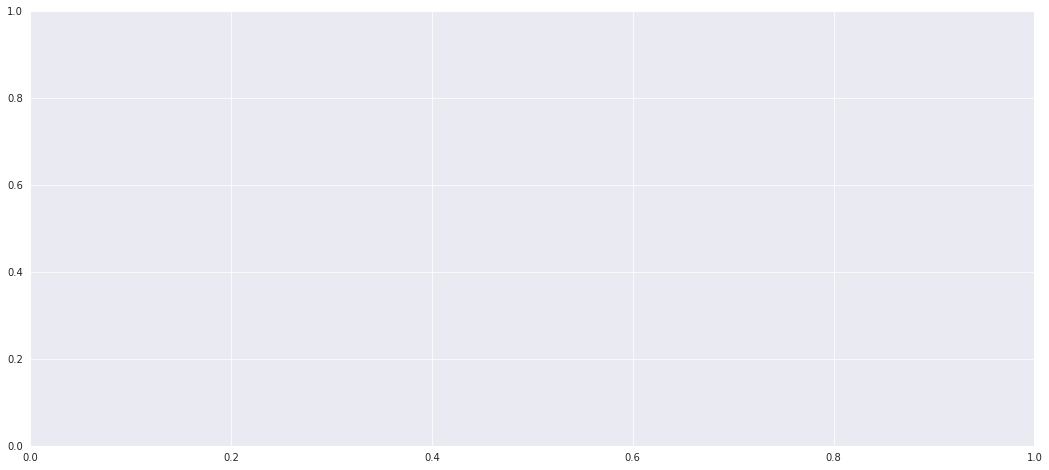

In [6]:
sns.set_style('darkgrid')
plt.subplots(figsize=(18,8))
sns.set(rc={'figure.figsize':(18,8)})

## 1.Preprocessing

Reading meta data file. This file includes descriptions of all the columns (Survey Questions) of the original data frame. 

In [7]:
df_schema = pd.read_csv('../input/so-survey-2017/survey_results_schema.csv', index_col=0)

In [8]:
df_schema.head()

,Question
Column,
Respondent,Respondent ID number
Professional,Which of the following best describes you?
ProgramHobby,Do you program as a hobby or contribute to ope...
Country,In which country do you currently live?
University,"Are you currently enrolled in a formal, degree..."


Reading main data file.

In [9]:
df = pd.read_csv('../input/so-survey-2017/survey_results_public.csv', index_col=0)

In [10]:
df.reset_index(inplace=True)
tot_records = len(df)
tot_columns = len(df.columns)
print ('number of records = ' + str(tot_records))
print ('number of columns = ' + str(tot_columns))
df.head(3)

number of records = 51392
number of columns = 154


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.000,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.000,Desktop; iOS app,At 

**Removing unimportant  fields.**

1. Remove columns where more than 90% of values are blank/NA.

In [11]:
na_columns = (df.isnull().mean() > 0.9)
na_col_list = na_columns[na_columns].index.tolist()
na_col_list = [e for e in na_col_list if e not in ('NonDeveloperType', 'ExpectedSalary')]
na_col_list

['YearsCodedJobPast',
 'MobileDeveloperType',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'TimeAfterBootcamp']

2. Remove Columns that are not related to career satisfaction or salary.

In [12]:
other_col_list = [
'Respondent',
'WebDeveloperType',
'MobileDeveloperType',
'AnnoyingUI',
'HoursPerWeek',
'ResumePrompted',
'SelfTaughtTypes',
'CousinEducation',
'VersionControl',
'InfluenceInternet',
'InfluenceWorkstation',
'InfluenceHardware',
'InfluenceServers',
'InfluenceTechStack',
'InfluenceDeptTech',
'InfluenceVizTools',
'InfluenceDatabase',
'InfluenceCloud',
'InfluenceConsultants',
'InfluenceRecruitment',
'InfluenceCommunication',
'StackOverflowDescribes',
'StackOverflowSatisfaction',
'StackOverflowDevices',
'StackOverflowFoundAnswer',
'StackOverflowCopiedCode',
'StackOverflowJobListing',
'StackOverflowCompanyPage',
'StackOverflowJobSearch',
'StackOverflowNewQuestion',
'StackOverflowAnswer',
'StackOverflowMetaChat',
'StackOverflowAdsRelevant',
'StackOverflowAdsDistracting',
'StackOverflowModeration',
'StackOverflowCommunity',
'StackOverflowHelpful',
'StackOverflowBetter',
'StackOverflowWhatDo',
'StackOverflowMakeMoney',
'SurveyLong',
'QuestionsInteresting',
'QuestionsConfusing',
'InterestedAnswers']

In [13]:
drop_columns = na_col_list + other_col_list
df.drop(drop_columns, axis=1, inplace=True)
print ('number of columns after removing = ' + str(len(df.columns)))

number of columns after removing = 100


A quick look at the distribution of career satisfaction.

In [14]:
print(df.CareerSatisfaction.describe())

count   42695.000
mean        7.301
std         1.955
min         0.000
25%         6.000
50%         8.000
75%         9.000
max        10.000
Name: CareerSatisfaction, dtype: float64


In [15]:
df.CareerSatisfaction.value_counts()

8.000     11037
7.000      9384
9.000      5579
10.000     5408
6.000      4721
5.000      3070
4.000      1352
3.000      1046
2.000       495
0.000       392
1.000       211
Name: CareerSatisfaction, dtype: int64

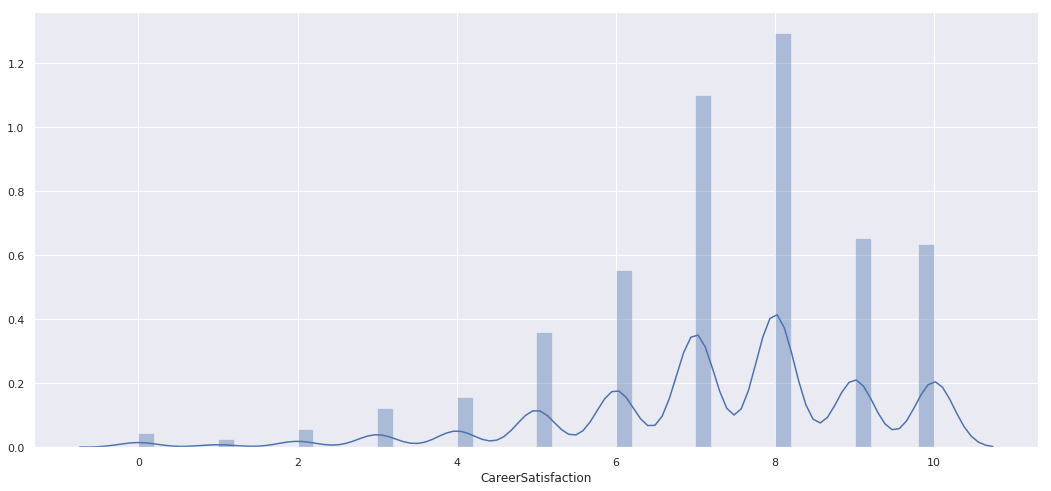

In [16]:
sns.distplot(df[(df.CareerSatisfaction.notnull())].CareerSatisfaction)

Add two new columns for analysis.
> 1.Country_code - since PPP indexes are based on country codes, we need to have this column. 
> 2.SalaryConverted - since salary values are in local currency, we need to convert those into a common scale. this is done by multiplying the input salaries by respective Purchasing Power Parity indexes.

Convert Country Name into standard Country name based of the 'wikipedia-iso-country-codes.csv' and add column "Country Code"

In [17]:
df = df[df.Country != 'I prefer not to say']

df['Country'].replace('Iran','Iran, Islamic Republic of',inplace=True)
df['Country'].replace('Vietnam','Viet Nam',inplace=True)
df['Country'].replace('Slovak Republic','Slovakia',inplace=True)
df['Country'].replace('Aland Islands','Åland Islands',inplace=True)
df['Country'].replace('Moldavia','Moldova, Republic of',inplace=True)
df['Country'].replace('Bolivia','Bolivia, Plurinational State of',inplace=True)
df['Country'].replace('Macedonia','Macedonia, the former Yugoslav Republic of',inplace=True)
df['Country'].replace('Bosnia-Herzegovina','Bosnia and Herzegovina',inplace=True)
df['Country'].replace('Virgin Islands (USA)','Virgin Islands, U.S.',inplace=True)
df['Country'].replace('Virgin Islands (British)','Virgin Islands, British',inplace=True)
df['Country'].replace('South Korea','Korea, Republic of',inplace=True)
df['Country'].replace('Taiwan','Taiwan, Province of China',inplace=True)
df['Country'].replace('North Korea','Korea, Democratic People\'s Republic of',inplace=True)
df['Country'].replace('S. Georgia & S. Sandwich Isls.','South Georgia and the South Sandwich Islands',inplace=True)
df['Country'].replace('Azerbaidjan','Azerbaijan',inplace=True)
df['Country'].replace('Venezuela','Venezuela, Bolivarian Republic of',inplace=True)
df['Country'].replace('Syria','Syrian Arab Republic',inplace=True)
df['Country'].replace('Tanzania','Tanzania, United Republic of',inplace=True)
df['Country'].replace('New Caledonia (French)','New Caledonia',inplace=True)
df['Country'].replace('Laos','Lao People\'s Democratic Republic',inplace=True)
df['Country'].replace('Reunion (French)','Réunion',inplace=True)
df['Country'].replace('Zaire','Congo, the Democratic Republic of the',inplace=True)
df['Country'].replace('Cote D\'Ivoire','Côte d\'Ivoire',inplace=True)
df['Country'].replace('Ivory Coast (Cote D\'Ivoire)','Côte d\'Ivoire',inplace=True)
df['Country'].replace('U.S. Minor Outlying Islands','United States Minor Outlying Islands',inplace=True)
df['Country'].replace('Polynesia (French)','French Polynesia',inplace=True)
df['Country'].replace('French Guyana','French Guiana',inplace=True)
df['Country'].replace('Pitcairn Island','Pitcairn',inplace=True)
df['Country'].replace('Libya','Libyan Arab Jamahiriya',inplace=True)
df['Country'].replace('Saint Vincent & Grenadines','Saint Vincent and the Grenadines',inplace=True)
df['Country'].replace('Martinique (French)','Martinique',inplace=True)
df['Country'].replace('Macau','Macao',inplace=True)
df['Country'].replace('Falkland Islands','Falkland Islands (Malvinas)',inplace=True)
df['Country'].replace('Tadjikistan','Tajikistan',inplace=True)
df['Country'].replace('Heard and McDonald Islands','Heard Island and McDonald Islands',inplace=True)
df['Country'].replace('Saint Helena','Saint Helena, Ascension and Tristan da Cunha',inplace=True)
df['Country'].replace('Vatican City State','Holy See (Vatican City State)',inplace=True)



In [18]:
import csv
dic = {}
with open("../input/iso-country-codes/wikipedia-iso-country-codes.csv", encoding='UTF-8') as f:
    file= csv.DictReader(f, delimiter=',')
    for line in file:
        dic[line['English short name lower case']] = line['Alpha-3 code']   
countries = df.Country
df['CountryCode']=[dic[x] for x in countries]

In [19]:
df.iloc[:5,-3:]

,Salary,ExpectedSalary,CountryCode
0,nan,nan,USA
1,nan,37500.000,GBR
2,113750.000,nan,GBR
3,nan,nan,USA
4,nan,nan,CHE


Convert Currency with PPP index and add column 'Salary Converted'.

In [20]:
df.Currency.isnull().mean()

0.5830016389604308

Thus, 42% of data has currency name populated.

In [21]:
df.Currency.value_counts(dropna=False)

NaN                            29880
U.S. dollars ($)                7059
Euros (€)                       5841
Indian rupees (?)               2174
British pounds sterling (£)     2170
Canadian dollars (C$)           1062
Polish zloty (zl)                564
Australian dollars (A$)          469
Russian rubles (?)               365
Brazilian reais (R$)             359
Swedish kroner (SEK)             305
Swiss francs                     300
South African rands (R)          174
Mexican pesos (MXN$)             144
Japanese yen (¥)                 123
Chinese yuan renminbi (¥)        120
Singapore dollars (S$)            79
Bitcoin (btc)                     64
Name: Currency, dtype: int64

Add CurrencyCode column and populate with respective codes for currency names

In [22]:
df['CurrencyCode']=df.Currency.apply(lambda x: 'USA' if x == 'U.S. dollars ($)' 
                         else 'EU28'if x == 'Euros (€)'
                         else 'GBR' if x == 'British pounds sterling (£)'
                         else 'IND' if x == 'Indian rupees (?)'
                        else  'CAN' if x == 'Canadian dollars (C$)'
                        else  'POL' if x == 'Polish zloty (zl)'
                        else 'AUS' if x == 'Australian dollars (A$)'
                        else 'RUS' if x == 'Russian rubles (?)'
                        else 'BRA' if x == 'Brazilian reais (R$)'
                        else 'SWE' if x == 'Swedish kroner (SEK)'
                        else 'CHE' if x ==  'Swiss francs'
                        else 'ZAF' if x == 'South African rands (R)'
                        else 'MEX' if x == 'Mexican pesos (MXN$)'
                        else 'JPN' if x == 'Japanese yen (¥)'
                        else 'CHN' if x == 'Chinese yuan renminbi (¥)'
                        else 'SGP' if x == 'Singapore dollars (S$)'
                        else 'BTC' if x == 'Bitcoin (btc)'
                                      else np.NaN)

In [23]:
(df.Salary.notnull() & df.Currency.isnull()).sum()

898

898 records have salary without currency

In [24]:
(df[(df.CurrencyCode.notnull())].CountryCode != df[(df.CurrencyCode.notnull())].CurrencyCode).sum()

7364

7364 records have currency code different from country code. Hence, we took currency code first when converting salary. If currency is not given, we used country code for currency conversion

Replace null currency code with country code.

In [25]:
df.CurrencyCode.fillna(df.CountryCode,inplace=True)

In [26]:
(df.Salary.notnull() & df.CurrencyCode.isnull()).sum()

0

In [27]:
df.loc[:,['Country','Currency','CurrencyCode']].head(5)

,Country,Currency,CurrencyCode
0,United States,NaN,USA
1,United Kingdom,British pounds sterling (£),GBR
2,United Kingdom,British pounds sterling (£),GBR
3,United States,NaN,USA
4,Switzerland,NaN,CHE


**Convert Salary and Expected Salary into worldwide standard salary scale based on the purchasing power parity index and add two new columns "SalaryConverted" and "ExpSalaryConverted".**
> used year 2016 data since survey was taken in 2017.

In [28]:
df_ppp = pd.read_csv('../input/purchasing-power-parity-rates/ppp_rates.csv')
df_ppp_2016 = df_ppp[ (df_ppp.TIME==2016)]
df_ppp_2016.head(3)
df_ppp_2016_index = df_ppp_2016.loc[:, ['LOCATION', 'Value']]
df_ppp_2016_index.head(3)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
16,AUS,PPP,TOT,NATUSD,A,2016,1.486,nan
34,AUT,PPP,TOT,NATUSD,A,2016,0.800,nan
52,BEL,PPP,TOT,NATUSD,A,2016,0.804,nan


,LOCATION,Value
16,AUS,1.486
34,AUT,0.800
52,BEL,0.804


In [29]:
df = df.merge(df_ppp_2016_index, how='left', left_on='CurrencyCode', right_on='LOCATION')
df.drop('LOCATION', axis=1, inplace=True)
df.rename(columns={'Value':'PPPIndex'},inplace=True)

Populate PPP Index manually for currencies that were not listed in the ppp_rates.csv file.

In [30]:
df.loc[df.CurrencyCode =='SGP','PPPIndex'] = 0.83
df.loc[df.CurrencyCode =='PAK','PPPIndex'] = 40.0
df.loc[df.CurrencyCode =='IRN','PPPIndex'] = 6200
df.loc[df.CurrencyCode =='UKR','PPPIndex'] = 4.4
df.loc[df.CurrencyCode =='PHL','PPPIndex'] = 27.0
df.loc[df.CurrencyCode =='MYS','PPPIndex'] = 1.88
df.loc[df.CurrencyCode =='NGA','PPPIndex'] = 120.0
df.loc[df.CurrencyCode =='AFG','PPPIndex'] = 27.5
df.loc[df.CurrencyCode =='BGD','PPPIndex'] = 33.0
df.loc[df.CurrencyCode =='HKG','PPPIndex'] = 5.0
df.loc[df.CurrencyCode =='PRK','PPPIndex'] = 4.4
df.loc[df.CurrencyCode =='LKA','PPPIndex'] = 11400.0
df.loc[df.CurrencyCode =='ARE','PPPIndex'] = 2.0

Add columns SalaryConverted and ExpSalaryConverted. To convert into stanard salary, divide original salary with PPP index.

In [31]:
df['SalaryConverted'] = df.Salary / df.PPPIndex
df['ExpSalaryConverted'] = df.ExpectedSalary / df.PPPIndex

#Drop PPPIndex as it will not be neededfor future analysis
df.drop(['PPPIndex'],axis=1,inplace=True)

create two data frames, one where respondents rated their career satisfaction, and one where not indicated;
> rest of the analysis is focused on dataframe that has career satisfaction populated.

In [32]:
df_js = df[df.CareerSatisfaction.notnull()]
df_no_js = df[ ~((df.CareerSatisfaction.notnull()))]
len(df_js) + len(df_no_js) == len(df)

True

In [33]:
print ('number of records in df_js = ' + str(len(df_js)))
print ('number of records in df_no_js = ' + str(len(df_no_js)))

number of records in df_js = 42618
number of records in df_no_js = 8634


In [34]:
df_js.groupby('Country').Country.apply(lambda x: x.count() == 1).sum()

32

There are 32 countries in the dataset where only one person from the country responded. However, for completeness retained those rows in the analysis.

## 2.Exploratory data analysis
Exploratory data analysis

## 2.1.Career satisfaction vs Job satisfaction

There are two columns 'JobSatisfaction' and 'CareerSatisfaction'. let's compare them.

In [35]:
print('percentage of rows where Job satisfaction is populated in the main dataset = ' + \
      str( (len(df[df.JobSatisfaction.notnull()]))/tot_records))
print('percentage of rows where Career satisfaction is populated in the main dataset = ' + \
      str( (len(df[df.CareerSatisfaction.notnull()]))/tot_records))

percentage of rows where Job satisfaction is populated in the main dataset = 0.7845968244084682
percentage of rows where Career satisfaction is populated in the main dataset = 0.8292730386052304


From above, career satisfaction has more number of records populated compared to job satisfaction.

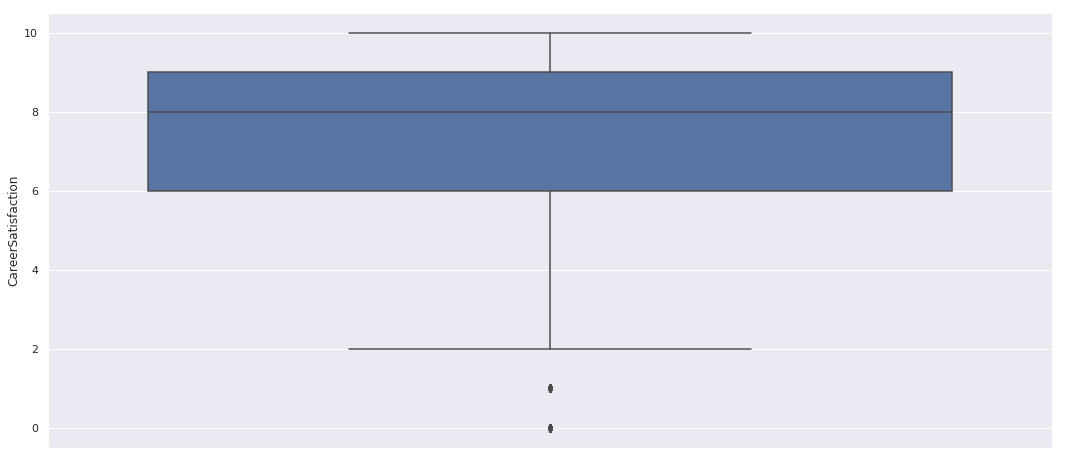

In [36]:
ax = sns.boxplot(y=df['CareerSatisfaction'])

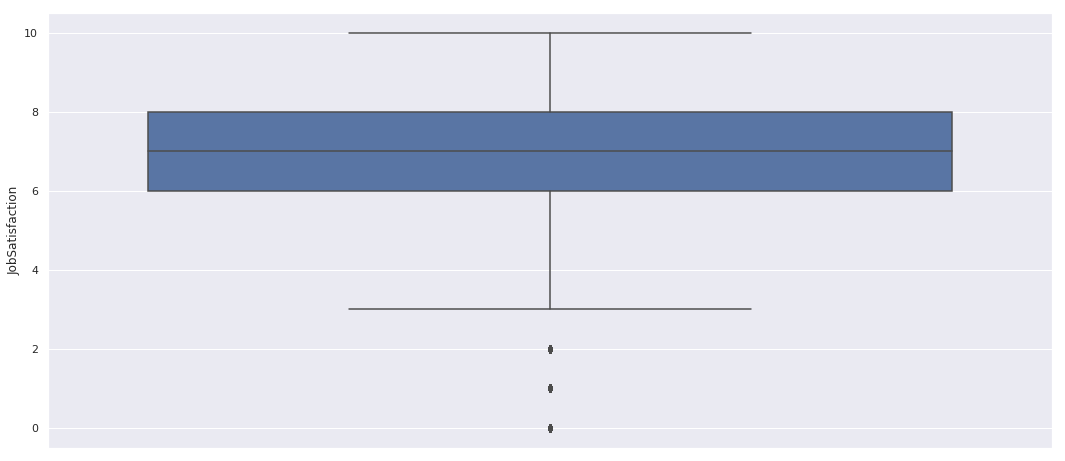

In [37]:
ax = sns.boxplot(y=df['JobSatisfaction'])

In [38]:
(df_js.JobSatisfaction.isnull()).sum()

2320

Thus, 2320 respondents did not indicate their job satisfaction though indicated their career satisfaction. We wanted to analyze who are those people.

In [39]:
df_js[(df_js.JobSatisfaction.isnull())].EmploymentStatus.value_counts()

Not employed, but looking for work                      850
Not employed, and not looking for work                  434
Employed full-time                                      350
I prefer not to say                                     336
Retired                                                 138
Independent contractor, freelancer, or self-employed    132
Employed part-time                                       80
Name: EmploymentStatus, dtype: int64

People either looking for job or who are retired are the ones who did not indicate job satisfaction, which is reasonable.

In [40]:
df_js.JobSatisfaction.corr(df.CareerSatisfaction)

0.645276085953926

In [41]:
df_js.JobSatisfaction.corr(df.CareerSatisfaction, method='spearman')

0.6298358903294065

In [42]:
df_js.JobSatisfaction.corr(df.CareerSatisfaction, method='kendall')

0.5340557710870361

Thus job satisfaction and career satisfaction are  correlated

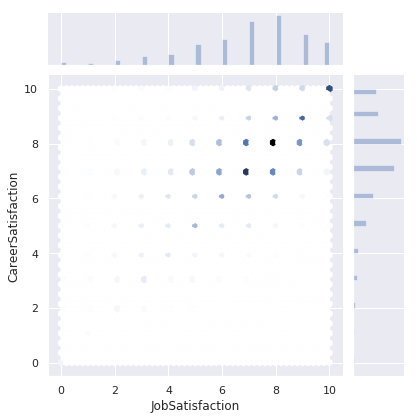

In [43]:
sns.jointplot(x='JobSatisfaction', y='CareerSatisfaction', data=df_js, kind='hex')

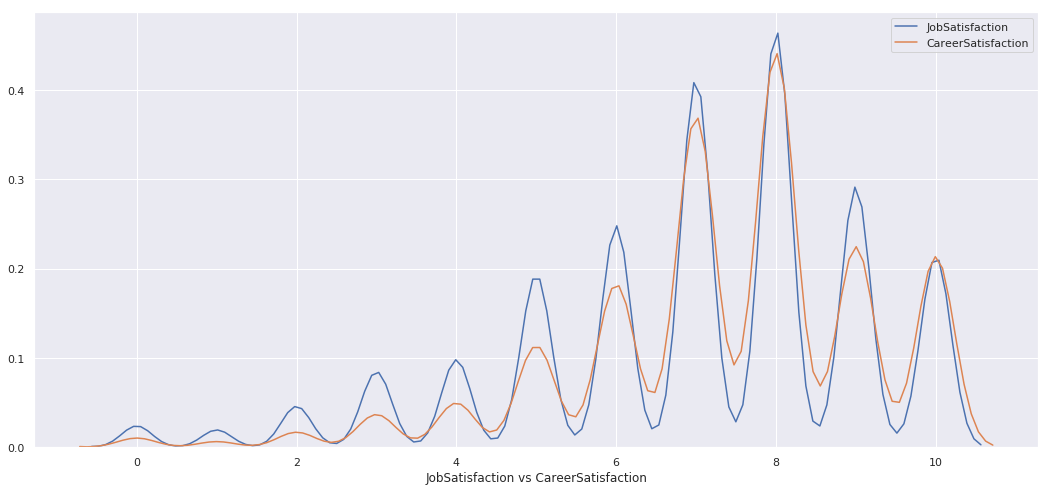

In [44]:
df_js_ca = df_js[ (df_js.JobSatisfaction.notnull()) & (df_js.CareerSatisfaction.notnull())]
sns.distplot(df_js_ca.JobSatisfaction,hist=False, label='JobSatisfaction')
sns.distplot(df_js_ca.CareerSatisfaction,hist=False, label='CareerSatisfaction', \
             axlabel='JobSatisfaction vs CareerSatisfaction')
plt.show()

,CareerSatisfaction,JobSatisfaction
2,8.000,9.000
3,6.000,3.000
4,6.000,8.000


,variable,value
0,CareerSatisfaction,8.000
1,CareerSatisfaction,6.000
2,CareerSatisfaction,6.000


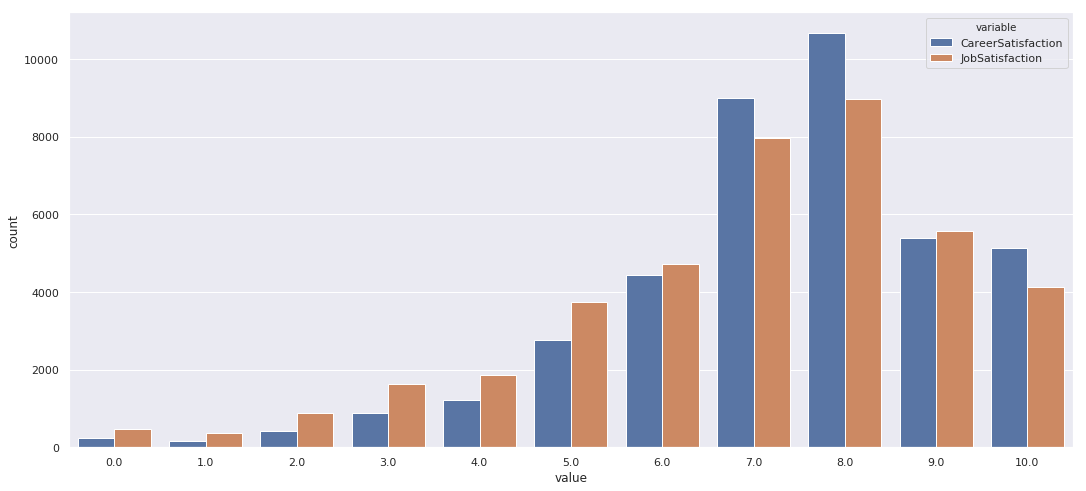

In [45]:
df_js_ca_m = df_js_ca.loc[:,'CareerSatisfaction':'JobSatisfaction']
df_js_ca_m.head(3)
df_js_ca_p = df_js_ca_m.melt()
df_js_ca_p.head(3)
sns.countplot(x='value', hue='variable', data=df_js_ca_p)

from the above graphs, we can see that people who are happy with their current job are also happy with their overall career and vice versa.

**Since career Satisfaction and Job Satisfaction are comparable and career satisfaction has higher number of records populated, let's focus our analysis on Career satisfaction only.**

In [46]:
equal_js_cs = (df_js_ca.JobSatisfaction == df_js_ca.CareerSatisfaction).sum()
print( 'Number of developers whose job satisfaction level is same as their career satisfaction = '+ str(equal_js_cs) )

Number of developers whose job satisfaction level is same as their career satisfaction = 16421


In [47]:
js_gt_cs = (df_js_ca.JobSatisfaction > df_js_ca.CareerSatisfaction).sum()
print( 'Number of developers whose job satisfaction level is higher than their career satisfaction = '+ str(js_gt_cs) )

Number of developers whose job satisfaction level is higher than their career satisfaction = 9053


In [48]:
cs_gt_js = (df_js_ca.JobSatisfaction < df_js_ca.CareerSatisfaction).sum()
print( 'Number of developers whose job satisfaction level is lower than their career satisfaction = '+ str(cs_gt_js) )

Number of developers whose job satisfaction level is lower than their career satisfaction = 14824


## 2.2.Career satisfaction vs Home remote

This section are examples of single column analysis done for each of the 100 columns in the data frame. Keeping only important ones here for space reasons.

One example : career satisfaction vs. HomeRemote option.

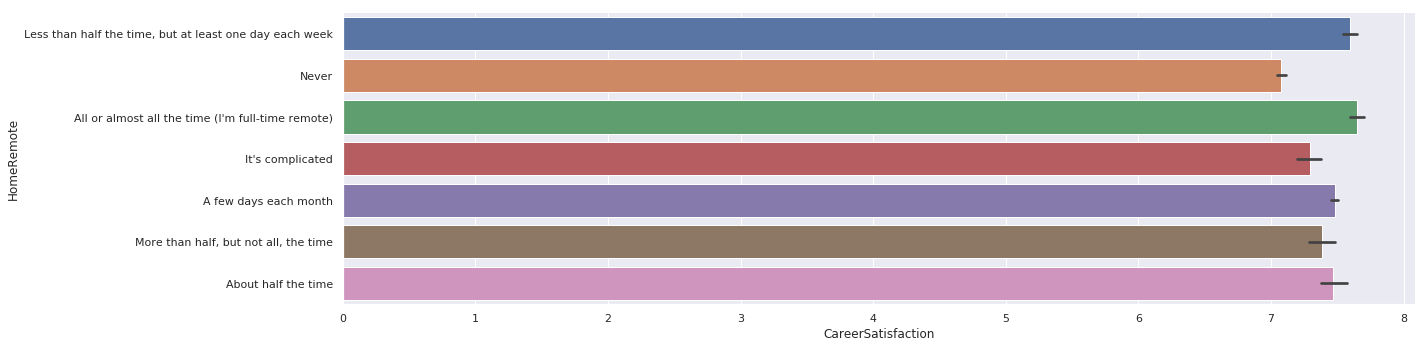

In [49]:
sns.factorplot(y='HomeRemote',x='CareerSatisfaction',data=df_js,aspect=4,kind='bar')

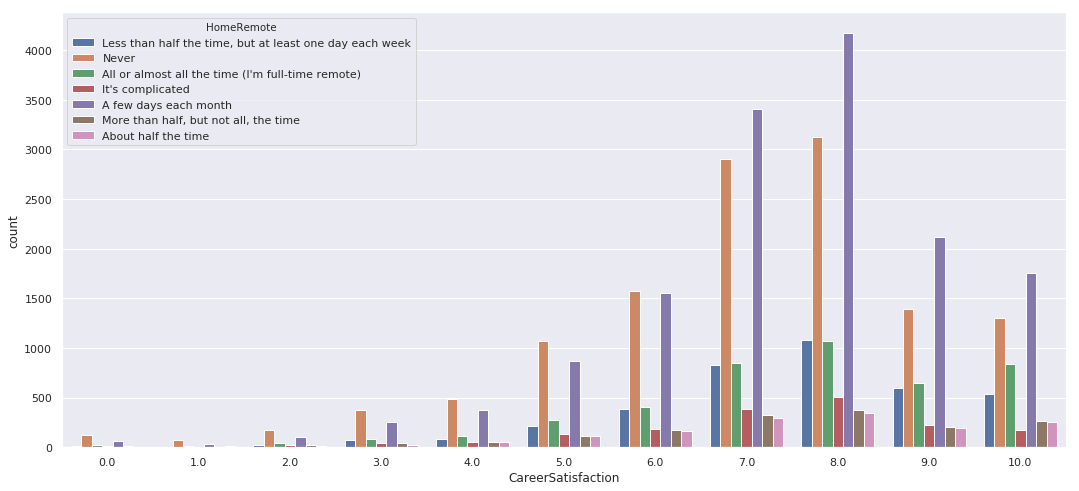

In [50]:
sns.countplot(x="CareerSatisfaction", hue='HomeRemote', data=df_js)

**as we can see, people who work full time remotely are most satisfied and people who never worked remotely are least satisfied.**

## 2.3.Data scientists vs other developers
Data-scientists-vs-other-developers

This section compares the career satisfaction among 'DataScientist' and other developers. Because 'DataScientist' shows up in both 'DeveloperType' and 'NonDeveloperType' columns so we had to count for both when considering if the respondent is data scientist or not.

In [51]:
df_js['DeveloperType'] = df_js['DeveloperType'].astype(str)
df_js['NonDeveloperType'] = df_js['NonDeveloperType'].astype(str)

In [52]:
def DeveloperType(datascientist):
    if 'Data scientist' in datascientist:
        return 1
    else:
        return 0

In [53]:
df_js['DataScientist1'] = df_js['DeveloperType'].apply(DeveloperType)
df_js['DataScientist2'] = df_js['NonDeveloperType'].apply(DeveloperType)
df_js['DataScientist3']=df_js.DataScientist1+df_js.DataScientist2

In [54]:
def DataScientist(datascientist):
    if datascientist>=1:
        return 'DataScientist'
    else:
        return 'Others'

In [55]:
df_js['DataScientist']=df_js['DataScientist3'].apply(DataScientist)

In [56]:
df_js.drop(['DataScientist1', 'DataScientist2', 'DataScientist3' ], axis=1, inplace=True)

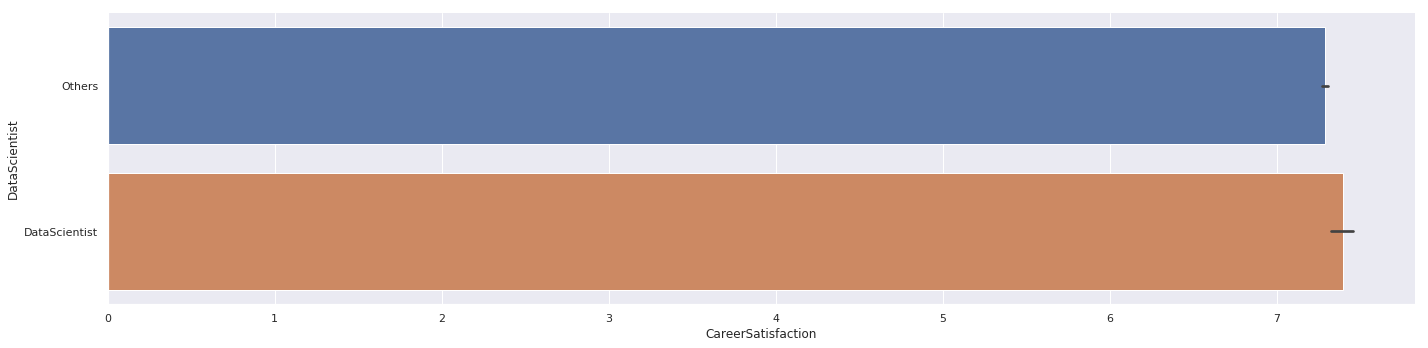

In [57]:
sns.factorplot(y='DataScientist',x='CareerSatisfaction',data=df_js,aspect=4,kind='bar')

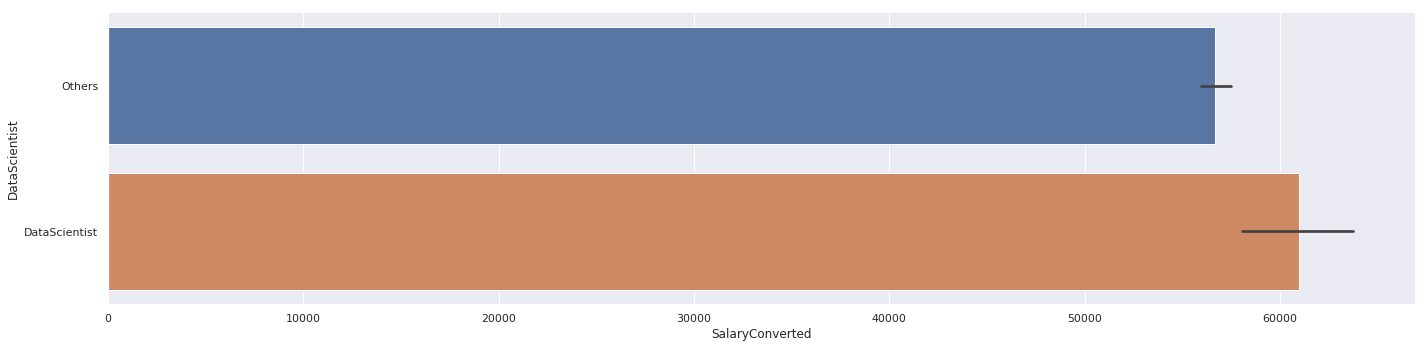

In [58]:
sns.factorplot(y='DataScientist',x='SalaryConverted',data=df_js,aspect=4,kind='bar')

In [59]:
df_js[df_js.SalaryConverted.notnull()].groupby('DataScientist').SalaryConverted.median()

DataScientist
DataScientist   58440.905
Others          55000.000
Name: SalaryConverted, dtype: float64

In [60]:
df_js.groupby('DataScientist').CareerSatisfaction.mean()

DataScientist
DataScientist   7.400
Others          7.291
Name: CareerSatisfaction, dtype: float64

**finding: as we can see, data scientists are slightly more happier and earn more compared to other types of developers on average.**

## 2.4.Plotting career satisfaction with plotly
Plotting-career-satisfaction-with-plotly

In [61]:
df_js.groupby('Country')['CareerSatisfaction'].agg(['mean','count']).nlargest(5,'mean')

,mean,count
Country,,
Lao People's Democratic Republic,10.000,1
Macao,10.000,1
Mali,10.000,1
Anguilla,9.500,2
Gabon,9.000,1


In [62]:
num_countries = len(df_js.groupby('Country')['CareerSatisfaction'].agg(['mean','count']))
print('Number of countries = '+ str(num_countries))

Number of countries = 191


In [63]:
df_worldsatisfaction=df_js.groupby('CountryCode',as_index=False)['CareerSatisfaction'].agg(['mean','count'],)
df_worldsatisfaction1=df_worldsatisfaction.reset_index()
df_worldsatisfaction1.to_csv('worldsatisfaction.csv')
df_worldsatisfaction1.head()

,CountryCode,mean,count
0,ABW,7.500,2
1,AFG,7.028,36
2,AGO,6.167,6
3,AIA,9.500,2
4,ALA,5.000,17


In [64]:
df_ws = pd.read_csv('worldsatisfaction.csv')

In [65]:
df_ws.head(5)

,Unnamed: 0,CountryCode,mean,count
0,0,ABW,7.500,2
1,1,AFG,7.028,36
2,2,AGO,6.167,6
3,3,AIA,9.500,2
4,4,ALA,5.000,17


In [66]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly as py

In [67]:
data = [ dict(
        type = 'choropleth',
        locations = df_worldsatisfaction1['CountryCode'],
        z = df_worldsatisfaction1['mean'],
        text = df_worldsatisfaction1['count'],
        colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'World Career Satisfaction'),
      ) ]

layout = dict(
    title = 'World Career Satisfaction',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

In [68]:
fig = dict( data=data, layout=layout )
py.offline.iplot( fig, validate=False, filename='d3-world-map' )

Interesting observation: developers in Latin America countries such as Mexico,Coumbia are more satisfied on average than US/Canada and Europe on average. Developers in North America are more satisfied than Europe on average.

## 2.5.Salary Analysis

Distribution of salary

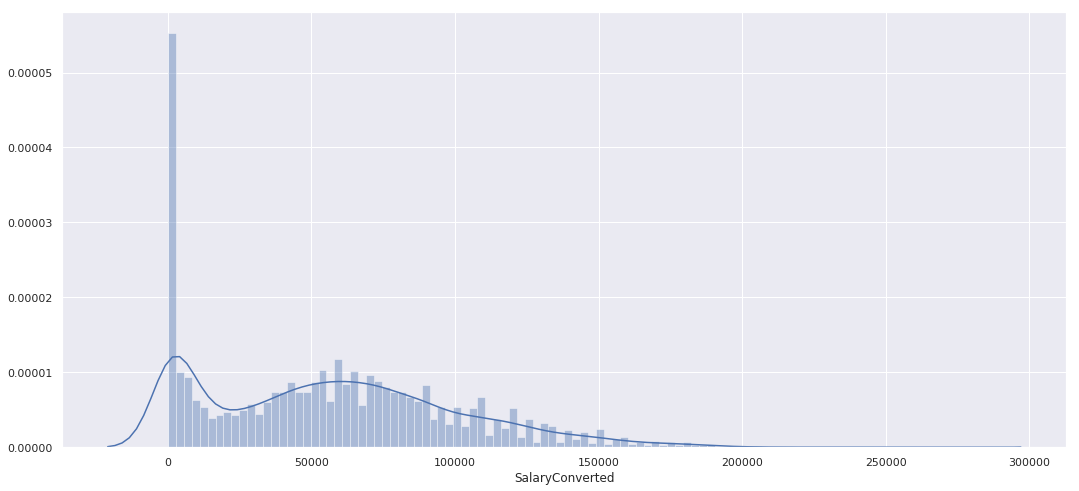

In [69]:
sns.distplot(df_js[df_js.SalaryConverted.notnull()].SalaryConverted, bins=100)

There seem to be data quality issues with salary data in the data set, few of them indicated zero salaries, and some less than 1. this trend can be seen in expected salary field as well. there could be some misinterpretation of the survey question by respondents. treated these low salary values as noise in the data and cleaned.

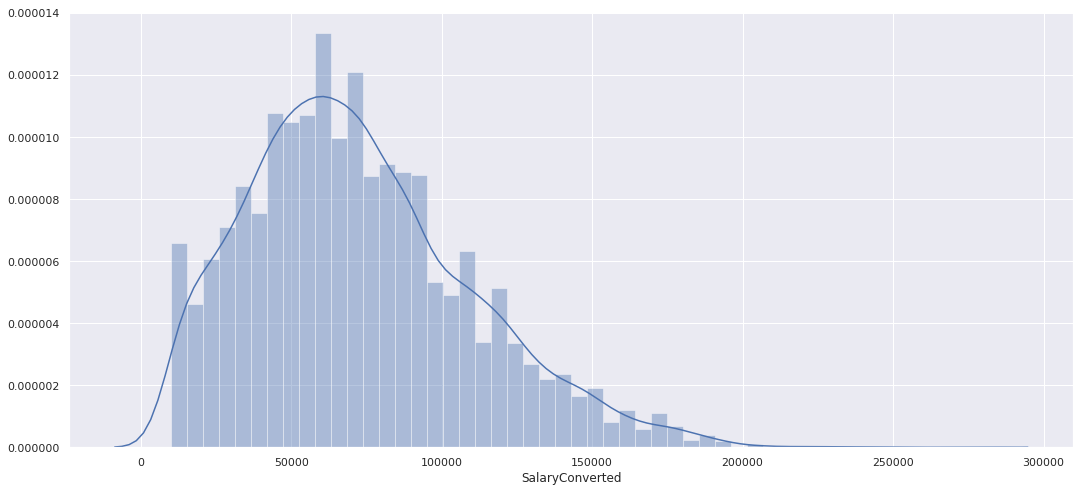

In [70]:
sns.distplot(df_js[df_js.SalaryConverted >10000].SalaryConverted)

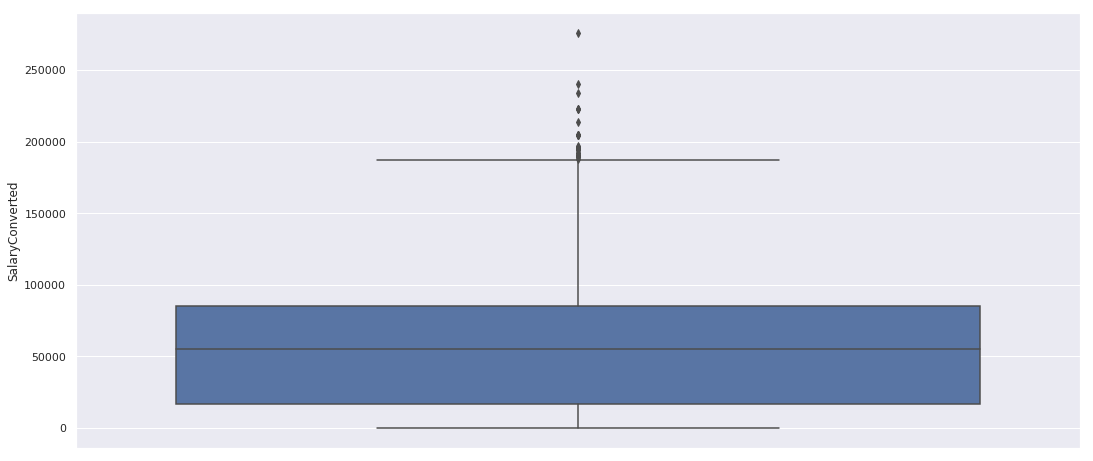

In [71]:
sns.boxplot(y=df_js.SalaryConverted)

Box plot shows some outliers in the uppper section

In [72]:
df_js[df_js.SalaryConverted.notnull()].SalaryConverted.describe()

count    12846.000
mean     56991.668
std      43804.168
min          0.000
25%      16575.182
50%      55000.000
75%      85000.000
max     276127.348
Name: SalaryConverted, dtype: float64

In [73]:
df_js[df_js.SalaryConverted.notnull()].SalaryConverted.median()

55000.0

In [74]:
df_js[df_js.SalaryConverted.notnull()].groupby('EmploymentStatus').SalaryConverted.describe()

,count,mean,std,min,25%,50%,75%,max
EmploymentStatus,,,,,,,,
Employed full-time,12402.000,58050.845,43901.789,0.000,18147.831,56979.882,87500.000,276127.348
Employed part-time,444.000,27406.256,27834.897,0.000,3233.637,19689.489,42532.479,185000.000


Example of salaries from countries where only one person responded, we think they may or may not to be representable of their country

In [75]:
df_js[df_js.SalaryConverted.notnull()].groupby('Country').SalaryConverted.agg(['mean','count']).nlargest(5,columns='mean')

,mean,count
Country,,
"Virgin Islands, U.S.",175000.000,1
Bermuda,150000.000,1
Uganda,120000.000,1
Kuwait,115200.000,1
Iceland,109576.696,1


Example of salaries that are less than 10 

In [76]:
df_js[df_js.SalaryConverted < 10].groupby('Country').SalaryConverted.agg(['mean','count']).nlargest(5,columns='mean')

,mean,count
Country,,
Nigeria,8.075,2
Bangladesh,7.593,1
Pakistan,7.335,4
Philippines,6.990,2
Hungary,6.675,6


Distribution of expected salary

In [77]:
df_no_js[df_no_js.ExpSalaryConverted.notnull()].groupby('EmploymentStatus').ExpSalaryConverted.describe()

,count,mean,std,min,25%,50%,75%,max
EmploymentStatus,,,,,,,,
Employed full-time,382.000,34265.022,30837.254,0.003,1931.447,36295.662,58440.905,142517.341
Employed part-time,498.000,41592.846,31375.913,0.000,5859.721,45184.789,65746.018,130000.000
I prefer not to say,98.000,34149.564,36030.158,0.000,1049.591,18208.980,60000.000,131492.036
"Independent contractor, freelancer, or self-employed",248.000,30207.729,33676.471,0.128,1136.080,19500.000,52596.814,150000.000
"Not employed, and not looking for work",653.000,33992.366,36530.813,0.000,1461.023,26298.407,58440.905,267220.014
"Not employed, but looking for work",665.000,24515.855,31858.162,0.000,420.770,4212.655,43830.679,180000.000
Retired,2.000,12098.554,17109.939,0.000,6049.277,12098.554,18147.831,24197.108


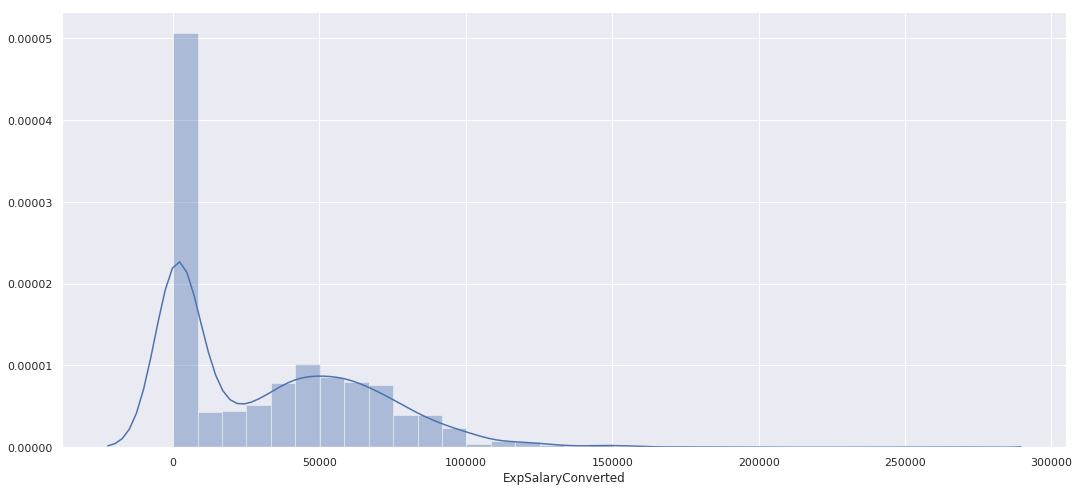

In [78]:
sns.distplot(df_no_js[df_no_js.ExpSalaryConverted.notnull()].ExpSalaryConverted)

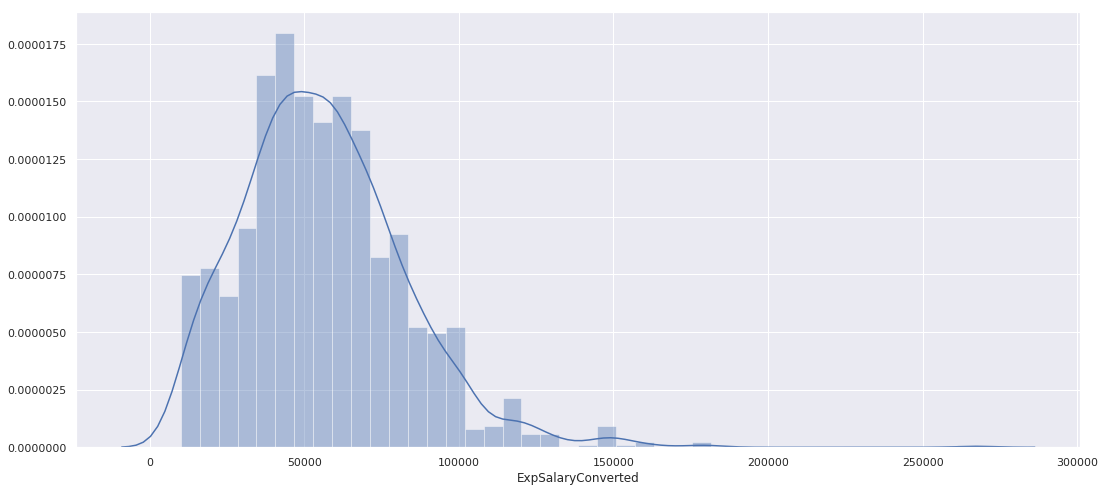

In [79]:
sns.distplot(df_no_js[df_no_js.ExpSalaryConverted > 10000].ExpSalaryConverted)

In [80]:
len(df_no_js[df_no_js.ExpSalaryConverted < 1000])/len(df_no_js)

0.07041927264303914

## 2.6.Salary vs Career satisfaction

Exploring weather job satisfaction/career satisfaction are correlated with salary.

In [81]:
df_js.JobSatisfaction.corr(df.SalaryConverted)

0.1083403415709511

In [82]:
df_js.CareerSatisfaction.corr(df.SalaryConverted)

0.13709776224978626

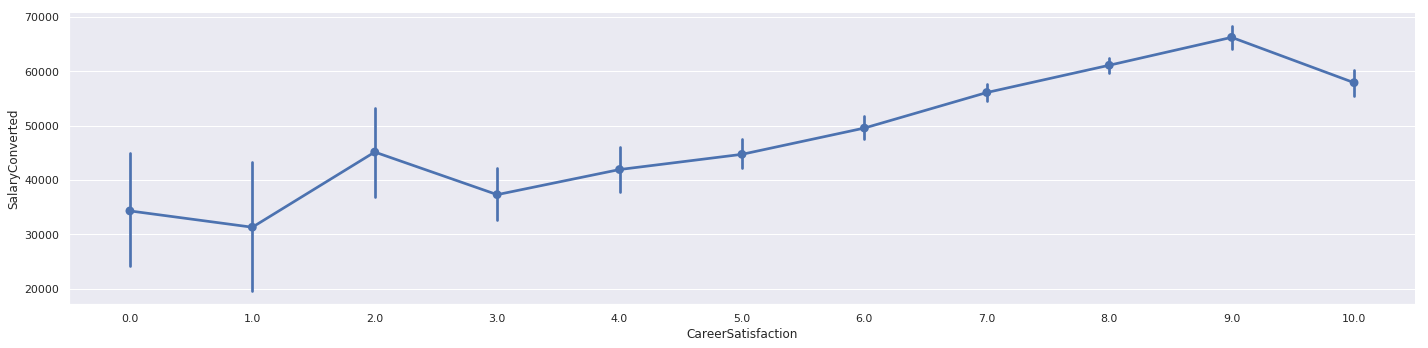

In [83]:
sns.factorplot(y='SalaryConverted',x='CareerSatisfaction',data=df_js,aspect=4,kind='point')

From above graph, it is evident that people with lower salaries are not that satisfied. We can also see that satisfaction level increases with increase in mean salary

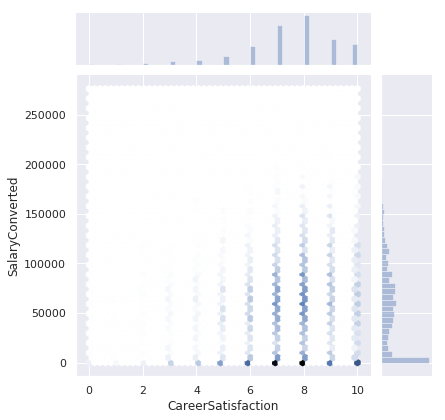

In [84]:
sns.jointplot(y='SalaryConverted', x='CareerSatisfaction', data=df_js, kind='hex')

Many people indicated salaries close to zero; it could be data quality issue.

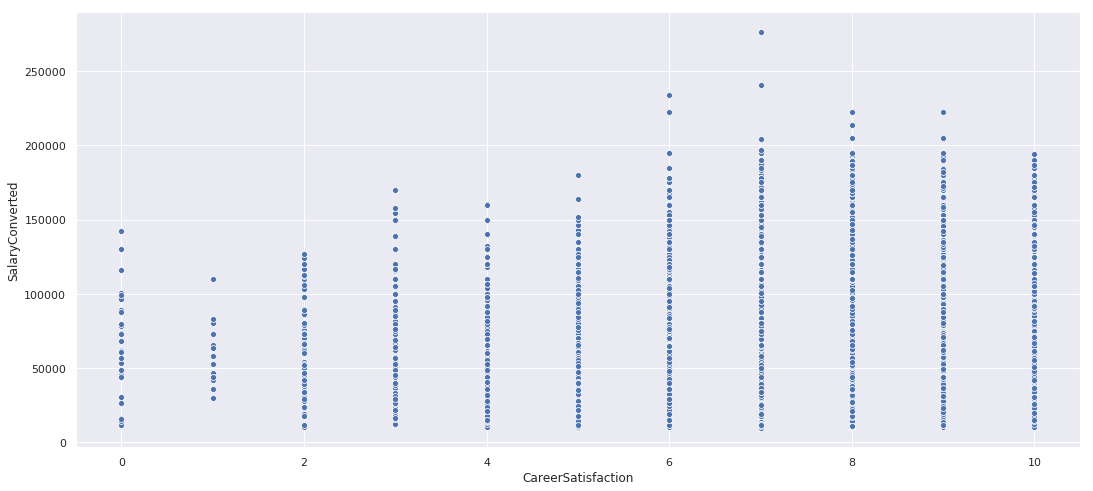

In [85]:
sns.scatterplot(y='SalaryConverted', x='CareerSatisfaction', data=df_js[df_js.SalaryConverted >10000])

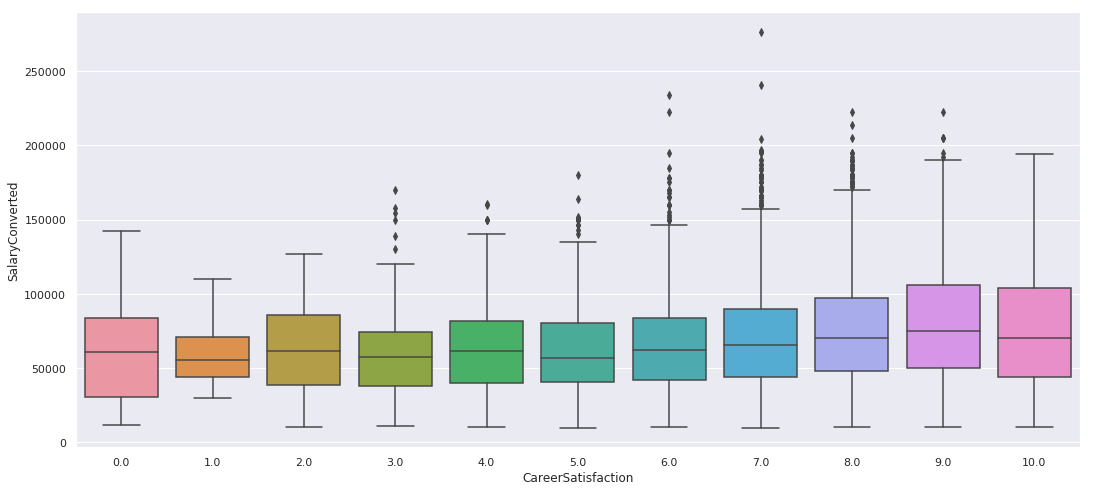

In [86]:
ax = sns.boxplot(y=df_js[df_js.SalaryConverted >10000].SalaryConverted, x=df_js[df_js.SalaryConverted >10000].CareerSatisfaction)

We can see that the there is no pattern in lower levels of satisfaction, however median salary gradually increases as career satisfaction level increases from 5 to 9 and and then comes little down for 10. However each satisfaction level has salaries ranging from zero. There are outliers in the upper sections. 


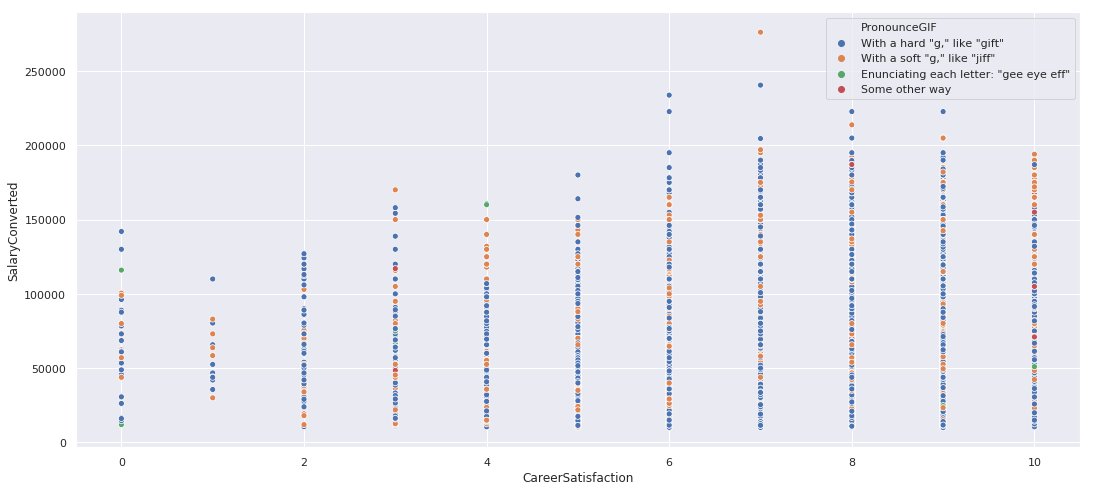

In [87]:
sns.scatterplot(y='SalaryConverted', x='CareerSatisfaction', hue = 'PronounceGIF',data=df_js[df_js.SalaryConverted >10000])

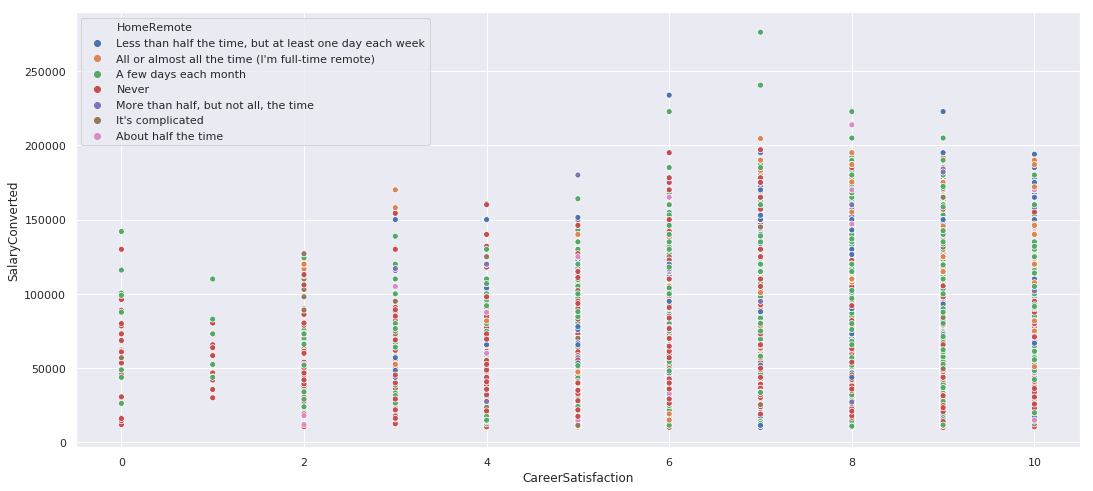

In [88]:
sns.scatterplot(y='SalaryConverted', x='CareerSatisfaction', hue = 'HomeRemote',data=df_js[df_js.SalaryConverted >10000])

**Salary vs Career satisfaction for USA, Germany and UK**

In [89]:
df_Country= df_js[(df_js.CountryCode=='USA') | (df_js.CountryCode=='DEU') | (df_js.CountryCode=='GBR')]

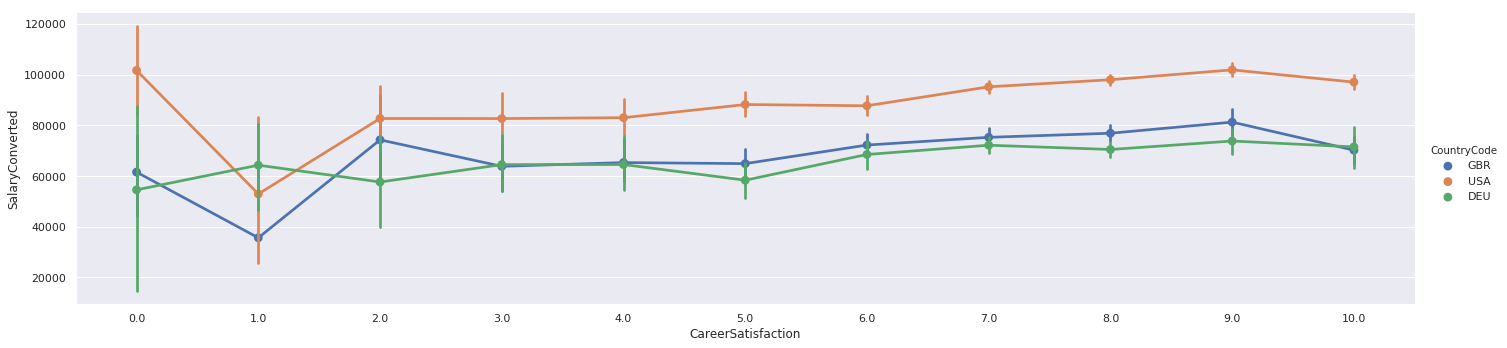

In [90]:
sns.factorplot(y='SalaryConverted',x='CareerSatisfaction',data=df_Country, hue= 'CountryCode',aspect=4,kind='point')

Individual countries also have similar pattern when satisfaction is plotted against salary. We can also see the gap between salaries in US vs other two countries. Developers in USA earn **20,000** more on an average compared to Germany and UK.

Removing the noise in the salary data

In [91]:
df_js[df_js.SalaryConverted.notnull()].describe()

,CareerSatisfaction,JobSatisfaction,Salary,ExpectedSalary,SalaryConverted,ExpSalaryConverted
count,12846.000,12832.000,12846.000,0.000,12846.000,0.000
mean,7.492,6.958,56240.310,nan,56991.668,nan
std,1.742,2.127,39829.930,nan,43804.168,nan
min,0.000,0.000,0.000,nan,0.000,nan
25%,7.000,6.000,26427.837,nan,16575.182,nan
50%,8.000,7.000,50000.000,nan,55000.000,nan
75%,9.000,8.000,80000.000,nan,85000.000,nan
max,10.000,10.000,197000.000,nan,276127.348,nan


Fill null salary values with median salary of that currency code

In [92]:
df_js['sal'] = df_js.groupby('CurrencyCode').SalaryConverted.transform(lambda x: x.fillna(x.median()))

In [93]:
df_js['SalaryConverted'] = df_js['sal']
df_js.drop('sal', axis=1, inplace=True)

Remvoing rows where salaries less than 1000

In [94]:
df_js.SalaryConverted.describe()

count    35886.000
mean     48139.607
std      40257.371
min          0.000
25%       5126.134
50%      49335.807
75%      89561.500
max     276127.348
Name: SalaryConverted, dtype: float64

In [95]:
df_js_no_zero_sal = df_js[df_js.SalaryConverted >= 1000]

In [96]:
df_js_no_zero_sal.SalaryConverted.describe()

count    28688.000
mean     60132.043
std      36197.382
min       1000.000
25%      31489.060
50%      67207.040
75%      89561.500
max     276127.348
Name: SalaryConverted, dtype: float64

In [97]:
print(len(df_js))
print(len(df_js_no_zero_sal))
print(len(df_js[df_js.SalaryConverted < 1000]))
print(len(df_js[df_js.SalaryConverted.isnull()]))

42618
28688
7198
6732


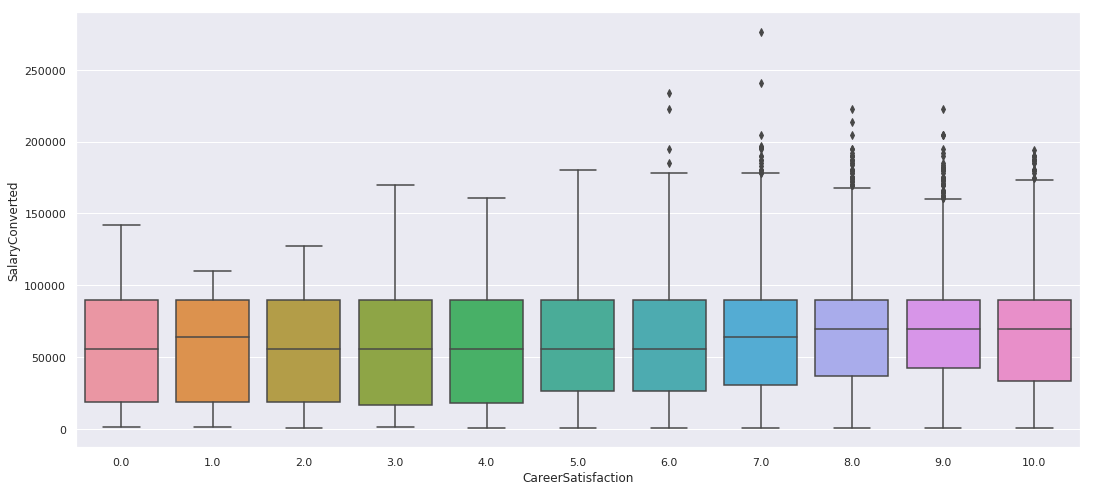

In [98]:
ax = sns.boxplot(y=df_js_no_zero_sal.SalaryConverted, x=df_js_no_zero_sal.CareerSatisfaction)

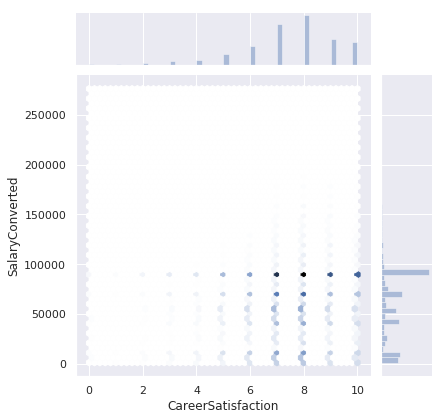

In [99]:
sns.jointplot(y='SalaryConverted', x='CareerSatisfaction', data=df_js_no_zero_sal, kind='hex')

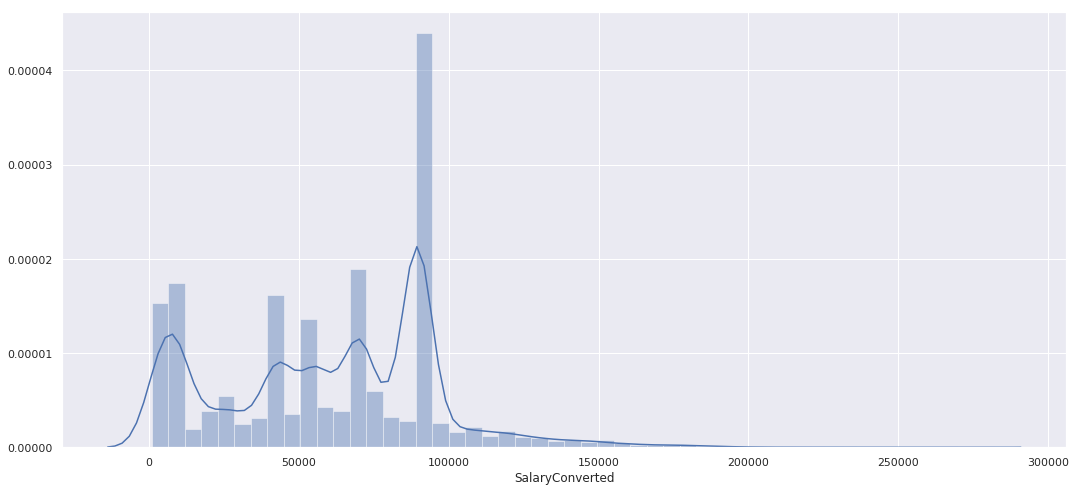

In [100]:
sns.distplot(df_js_no_zero_sal.SalaryConverted)

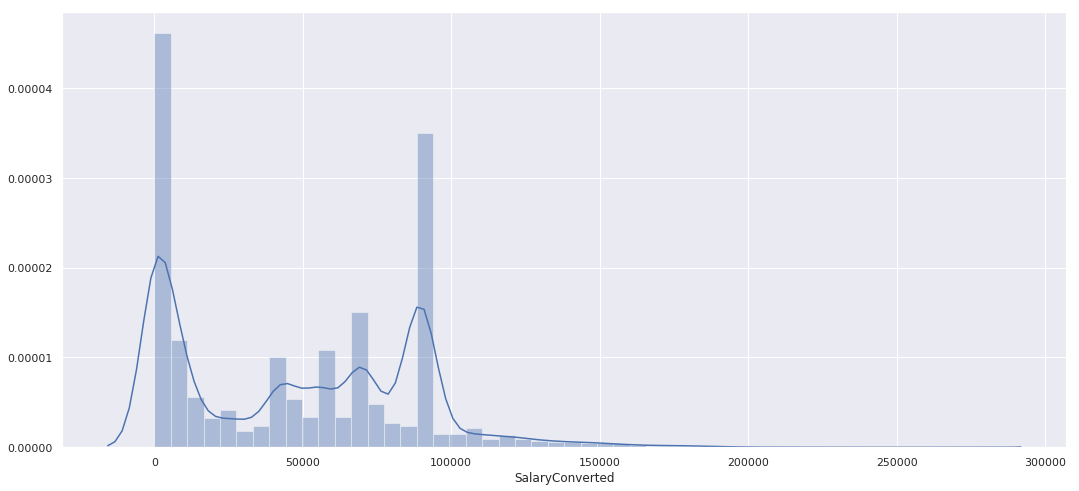

In [101]:
sns.distplot(df_js[df_js.SalaryConverted.notnull()].SalaryConverted)

## 2.7.Plotting worldwide salary with plotly
Plotting-worldwide-salary-with-plotly

In [102]:
df_js_1=df_js_no_zero_sal
df_worldsalary=df_js_1.groupby('CountryCode',as_index=False)['SalaryConverted'].agg(['mean','count'],)
df_worldsalary1=df_worldsalary.reset_index()
df_worldsalary1.to_csv('worldsalary.csv')
df_worldsalary1.head()

,CountryCode,mean,count
0,AFG,38277.233,4
1,AIA,81171.598,1
2,ALB,59872.947,10
3,AND,55518.860,1
4,ANT,73054.439,1


In [103]:
df_world_sal = pd.read_csv('worldsalary.csv')

data = [ dict(
        type = 'choropleth',
        locations = df_worldsalary1['CountryCode'],
        z = df_worldsalary1['mean'],
        text = df_worldsalary1['count'],
        colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'USD'),
      ) ]

layout = dict(
    title = 'Worldwide Salary Level',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.offline.iplot( fig, validate=False, filename='d3-world-map' )

## 2.8.Tabs vs Spaces

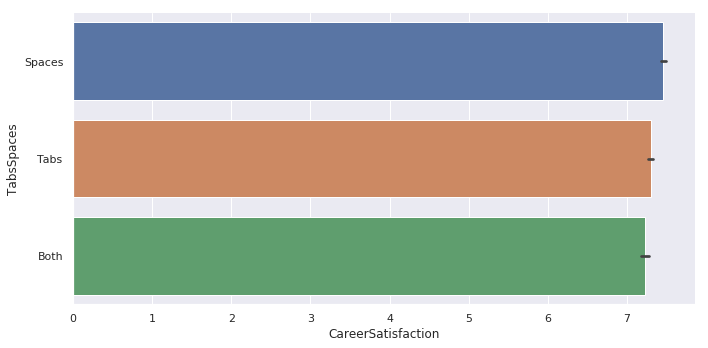

In [104]:
sns.factorplot(y='TabsSpaces',x='CareerSatisfaction',data=df_js,aspect=2,kind='bar')

Developers who use Spaces are slighly more satisfied compared to those who use Tabs

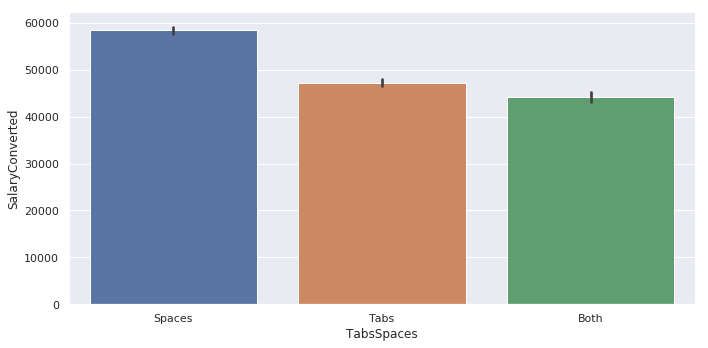

In [105]:
sns.factorplot(y='SalaryConverted',x='TabsSpaces',data=df_js,aspect=2,kind='bar')

In [106]:
df_js.groupby('TabsSpaces').SalaryConverted.median()

TabsSpaces
Both     42369.656
Spaces   62823.973
Tabs     47500.000
Name: SalaryConverted, dtype: float64

However the difference is signifacant when it comes to salary. Developers who use Spaces earn **15,000** more on an average compared to those who use Tabs

## 2.9.Preferred benefit analysis

Put career satisfaction into three bins base on their ratings. Satisfaction levels 1 to 4 are put into 'Not Satisfied' bucket, 5 and 6 are into 'Neutral', and 7 to 10 into 'Satisfied'.

In [107]:
df_js['CareerSatisfactionBin']=pd.cut(df_js.JobSatisfaction, bins=[0,4,6,10], labels=['Not Satisfied', 'Neutral', 'Satisfied'])

There are some questions where users provided ratings in literal responses, we need to find those columns and assign them numerical values for our analysis. Used 1 to 5 scale to convert the literal responses, ex: Very satisfied is assigned as 5, Not at all satisfied as 1.

In [108]:
satisfaction_responses = ['Very satisfied','Satisfied','Somewhat satisfied', 'Not very satisfied','Not at all satisfied']
agree_responses = ['Strongly agree', 'Agree','Somewhat agree', 'Strongly disagree','Disagree']
importance_responses = ['Very important','Important','Somewhat important','Not very important','Not at all important']

Identify the columns with literal responses

In [109]:
s = (df_js.isin(importance_responses).sum() != 0)
importance_col_list = s[s].index.tolist()
importance_col_list

['AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobTech',
 'AssessJobProjects',
 'AssessJobCompensation',
 'AssessJobOffice',
 'AssessJobCommute',
 'AssessJobRemote',
 'AssessJobLeaders',
 'AssessJobProfDevel',
 'AssessJobDiversity',
 'AssessJobProduct',
 'AssessJobFinances',
 'ImportantHiringAlgorithms',
 'ImportantHiringTechExp',
 'ImportantHiringCommunication',
 'ImportantHiringOpenSource',
 'ImportantHiringPMExp',
 'ImportantHiringCompanies',
 'ImportantHiringTitles',
 'ImportantHiringEducation',
 'ImportantHiringRep',
 'ImportantHiringGettingThingsDone',
 'EducationImportant']

Use 1 to 5 scale

In [110]:
for col in importance_col_list:
    df_js[col].replace({'Very important':5, 'Important':4, 'Somewhat important':3,\
                        'Not very important':2, 'Not at all important':1, np.NaN:0}, inplace=True)

Split the column list into groups based on question type

In [111]:
job_features_col_list = []
hiring_criteria_col_list = []

for col in importance_col_list:
    if col.startswith('Assess'):
        job_features_col_list.append(col)
    elif col.startswith('Important'):
        hiring_criteria_col_list.append(col)

job_features_col_list
hiring_criteria_col_list

['AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobTech',
 'AssessJobProjects',
 'AssessJobCompensation',
 'AssessJobOffice',
 'AssessJobCommute',
 'AssessJobRemote',
 'AssessJobLeaders',
 'AssessJobProfDevel',
 'AssessJobDiversity',
 'AssessJobProduct',
 'AssessJobFinances']

['ImportantHiringAlgorithms',
 'ImportantHiringTechExp',
 'ImportantHiringCommunication',
 'ImportantHiringOpenSource',
 'ImportantHiringPMExp',
 'ImportantHiringCompanies',
 'ImportantHiringTitles',
 'ImportantHiringEducation',
 'ImportantHiringRep',
 'ImportantHiringGettingThingsDone']

In this category 'Assess Job', it is asking a scienario type of question, 'When you're assessing potential jobs to apply to, how important are each of the following to you?' From below analysis, we want to explore if any single factor stands out to Developers

In [112]:
job_features_total_scores = df_js.groupby('CareerSatisfactionBin',as_index=False)[job_features_col_list].sum()
job_features_total_scores = job_features_total_scores.melt(id_vars=['CareerSatisfactionBin'])
job_features_total_scores.head(5)

,CareerSatisfactionBin,variable,value
0,Not Satisfied,AssessJobIndustry,8854
1,Neutral,AssessJobIndustry,15138
2,Satisfied,AssessJobIndustry,35299
3,Not Satisfied,AssessJobRole,9367
4,Neutral,AssessJobRole,16152


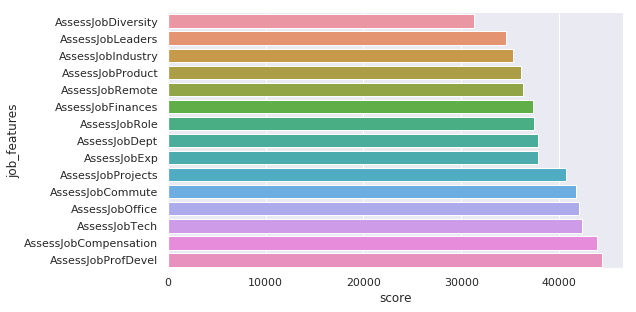

In [113]:
job_features_satisfied=job_features_total_scores.loc[job_features_total_scores.CareerSatisfactionBin=='Satisfied']
job_features_satisfied1=job_features_satisfied.sort_values('value')
g = sns.factorplot(x='value', y='variable', data=job_features_satisfied1, aspect=2, kind='bar', size=4.5)
g.set_axis_labels("score","job_features")

In the end, we can see that 'JobProfDevel' (Opportunities of Job Development) and Compensation are the two most important factors, whereas diversity and company leaders are considered lease important by job seekers.

Analyze Developers' behavior or personality to see if anything interesting we can find, showing below.

In [114]:
s = (df_js.isin(agree_responses).sum() != 0)
agree_col_list = s[s].index.tolist()
agree_col_list

['ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'ShipIt',
 'OtherPeoplesCode',
 'ProjectManagement',
 'EnjoyDebugging',
 'InTheZone',
 'DifficultCommunication',
 'CollaborateRemote']

In [115]:
personality_col_list = agree_col_list[:16]
workstyle_col_list= list(set(agree_col_list) - set(personality_col_list))
personality_col_list
workstyle_col_list

['ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld']

['OtherPeoplesCode',
 'EnjoyDebugging',
 'InTheZone',
 'DifficultCommunication',
 'ProjectManagement',
 'ShipIt',
 'CollaborateRemote']

In [116]:
for col in agree_col_list:
    df_js[col].replace({'Strongly agree':5, 'Agree':4, 'Somewhat agree':3,\
                        'Disagree':2, 'Strongly disagree':1,  np.NaN:0}, inplace=True)

,CareerSatisfactionBin,variable,value
0,Not Satisfied,ImportantHiringAlgorithms,10103
1,Neutral,ImportantHiringAlgorithms,17858
2,Satisfied,ImportantHiringAlgorithms,58401
3,Not Satisfied,ImportantHiringTechExp,9560
4,Neutral,ImportantHiringTechExp,16950


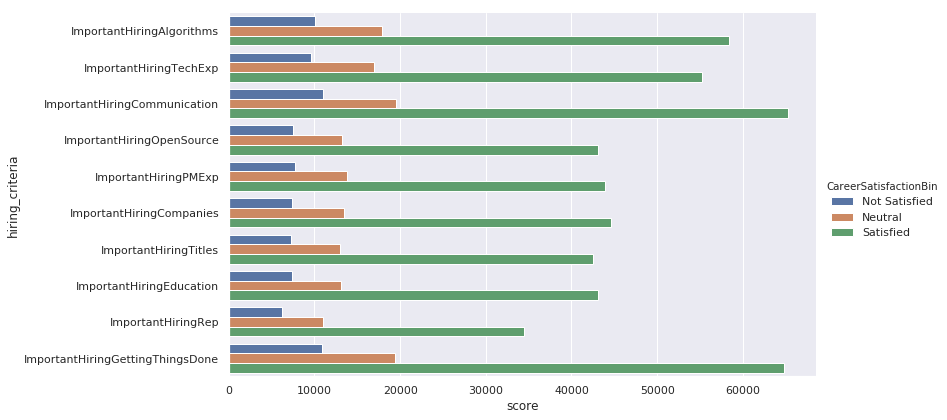

In [117]:
hiring_criteria_total_scores = df_js.groupby('CareerSatisfactionBin',as_index=False)[hiring_criteria_col_list].sum()
hiring_criteria_total_scores = hiring_criteria_total_scores.melt(id_vars=['CareerSatisfactionBin'])
hiring_criteria_total_scores.head(5)
g = sns.factorplot(x='value', y='variable', data=hiring_criteria_total_scores, \
                   hue='CareerSatisfactionBin', aspect=2, kind='bar', size=6)
g.set_axis_labels("score","hiring_criteria")

From the above graph, we can see that hiring personnel give most importance to Communication and Getting things done qualities from job seekers.

,CareerSatisfactionBin,variable,value
0,Not Satisfied,ProblemSolving,13081
1,Neutral,ProblemSolving,23486
2,Satisfied,ProblemSolving,76947
3,Not Satisfied,BuildingThings,12848
4,Neutral,BuildingThings,23156


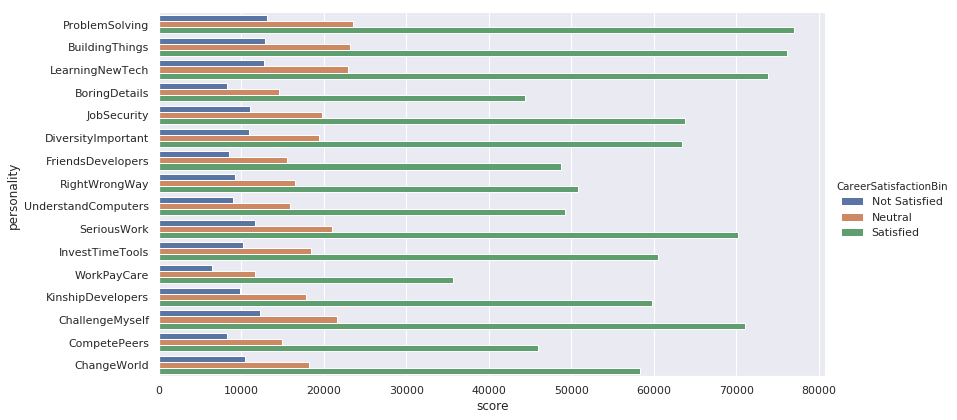

In [118]:
personality_total_scores = df_js.groupby('CareerSatisfactionBin',as_index=False)[personality_col_list].sum()
personality_total_scores = personality_total_scores.melt(id_vars=['CareerSatisfactionBin'])
personality_total_scores.head(5)
g = sns.factorplot(x='value', y='variable', data=personality_total_scores, \
                   hue='CareerSatisfactionBin', aspect=2, kind='bar', size=6)
g.set_axis_labels("score","personality")

Developers like Problem solving the most. Building things and Learning new technologies come next.

,CareerSatisfactionBin,variable,value
0,Not Satisfied,OtherPeoplesCode,9400
1,Neutral,OtherPeoplesCode,16224
2,Satisfied,OtherPeoplesCode,50277
3,Not Satisfied,EnjoyDebugging,9213
4,Neutral,EnjoyDebugging,16626


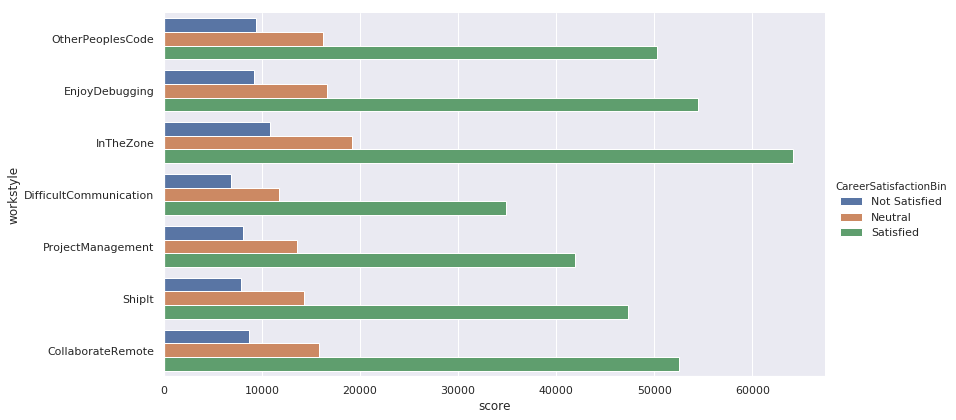

In [119]:
workstyle_total_scores = df_js.groupby('CareerSatisfactionBin',as_index=False)[workstyle_col_list].sum()
workstyle_total_scores = workstyle_total_scores.melt(id_vars=['CareerSatisfactionBin'])
workstyle_total_scores.head(5)
g = sns.factorplot(x='value', y='variable', data=workstyle_total_scores, \
                   hue='CareerSatisfactionBin', aspect=2, kind='bar', size=6)
g.set_axis_labels("score","workstyle")

Developers would like to get into their own zone while coding and they also enjoy debugging 

In the following code, analyze all standard benefits, to see which one the developers value the most. The technique used for this analysis is word count because some respondents responded with several options.

First find out the list of benefit given in the questions

In [120]:
import_benefits=df_js.loc[:, ['ImportantBenefits']]
import_benefits=import_benefits[import_benefits.ImportantBenefits.notnull()]
import_benefits.ImportantBenefits = import_benefits.ImportantBenefits.str.replace('\s+', '')
import_benefits['ImportantBenefits'] = import_benefits['ImportantBenefits'].astype(str)
import_benefits1=import_benefits['ImportantBenefits'].str.get_dummies(sep=';')
benefits=import_benefits['ImportantBenefits'].str.lower().str.split(';')
benefits.head()

3    [stockoptions, annualbonus, healthbenefits, eq...
6    [healthbenefits, equipment, professionaldevelo...
7    [equipment, professionaldevelopmentsponsorship...
8    [stockoptions, annualbonus, healthbenefits, eq...
9    [vacation/daysoff, long-termleave, expectedwor...
Name: ImportantBenefits, dtype: object

In [121]:
import_benefits1.head()

,Annualbonus,Charitablematch,Child/eldercare,Educationsponsorship,Equipment,Expectedworkhours,Healthbenefits,Long-termleave,Meals,Noneofthese,Other,Privateoffice,Professionaldevelopmentsponsorship,Remoteoptions,Retirement,Stockoptions,Vacation/daysoff
3,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
6,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0
7,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0
8,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0
9,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1


In [122]:
list(import_benefits1.columns.values)

['Annualbonus',
 'Charitablematch',
 'Child/eldercare',
 'Educationsponsorship',
 'Equipment',
 'Expectedworkhours',
 'Healthbenefits',
 'Long-termleave',
 'Meals',
 'Noneofthese',
 'Other',
 'Privateoffice',
 'Professionaldevelopmentsponsorship',
 'Remoteoptions',
 'Retirement',
 'Stockoptions',
 'Vacation/daysoff']

With the list of benefits found, start counting the number of times it shows up in the responses

In [123]:
Annual_bonus = import_benefits1['Annualbonus'].sum()
Charitable_match = import_benefits1['Charitablematch'].sum()
Child_elder_care = import_benefits1['Child/eldercare'].sum()
Education_sponsorship = import_benefits1['Educationsponsorship'].sum()
Equipment = import_benefits1['Equipment'].sum()
Expected_work_hours = import_benefits1['Expectedworkhours'].sum()
Health_benefits = import_benefits1['Healthbenefits'].sum()
Longterm_leave = import_benefits1['Long-termleave'].sum()
Meals = import_benefits1['Meals'].sum()
None_of_these = import_benefits1['Noneofthese'].sum()
Private_office = import_benefits1['Privateoffice'].sum()
Professional_development_sponsorship = import_benefits1['Professionaldevelopmentsponsorship'].sum()
Remote_options = import_benefits1['Remoteoptions'].sum()
Retirement = import_benefits1['Retirement'].sum()
Stock_options = import_benefits1['Stockoptions'].sum()
Vacation = import_benefits1['Vacation/daysoff'].sum()
Others = import_benefits1['Other'].sum()

print ("Annual_bonus = %d " % Annual_bonus)
print ("Charitable_match = %d " % Charitable_match)
print ("Child_elder_care = %d " % Child_elder_care)
print ("Education_sponsorship = %d " % Education_sponsorship)
print ("Equipment count = %d " % Equipment)
print ("Expected_work_hours count = %d " % Expected_work_hours)
print ("Health_benefits count = %d " % Health_benefits)
print ("Longterm_leave count = %d " % Longterm_leave)
print ("Meals count = %d " % Meals)
print ("Private_office count = %d " % Private_office)
print ("Professional_development_sponsorship = %d " % Professional_development_sponsorship)
print ("Remote_options count = %d " % Remote_options)
print ("Retirement count = %d " % Retirement)
print ("Vacation count = %d " % Vacation)
print ("Stock_options count = %d " % Stock_options)
print ("others count = %d " % Others)
print ("None of these count = %d " % None_of_these)

Annual_bonus = 8518 
Charitable_match = 656 
Child_elder_care = 2298 
Education_sponsorship = 4207 
Equipment count = 10443 
Expected_work_hours count = 11699 
Health_benefits count = 12437 
Longterm_leave count = 3692 
Meals count = 3666 
Private_office count = 2866 
Professional_development_sponsorship = 9954 
Remote_options count = 14209 
Retirement count = 7034 
Vacation count = 15265 
Stock_options count = 3960 
others count = 774 
None of these count = 540 


Then create new dataframe with their counts for plot

In [124]:
Benefit1 = {'Benefit': ['Annual_bonus','Charitable_match','Child_elder_care','Education_sponsorship','Equipment','Expected_work_hours','Health_benefits','Longterm_leave','Meals','None_of_these','Private_office','Professional_development_sponsorship','Remote_options','Retirement','Stock_options','Vacation','Others'],\
           'Score': [Annual_bonus,Charitable_match,Child_elder_care,Education_sponsorship,Equipment,Expected_work_hours,Health_benefits,Longterm_leave,Meals,None_of_these,Private_office,Professional_development_sponsorship,Remote_options,Retirement,Stock_options,Vacation,Others]}
Benefit = pd.DataFrame(data=Benefit1)
Benefit=Benefit.sort_values('Score')

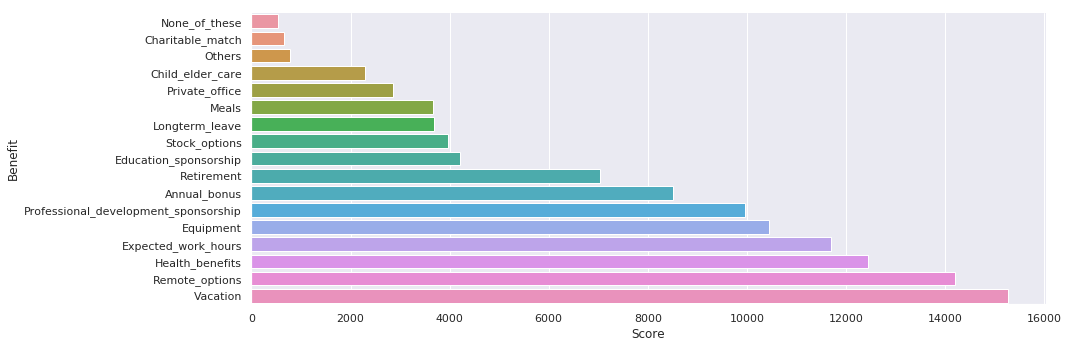

In [125]:
sns.factorplot(x='Score',y='Benefit',data=Benefit,aspect=3,kind='bar')

**Vacation**, **remote option** and **health benefits** are the top three benefits developers seek.

 single column analysis between career satisfaction and working remote 

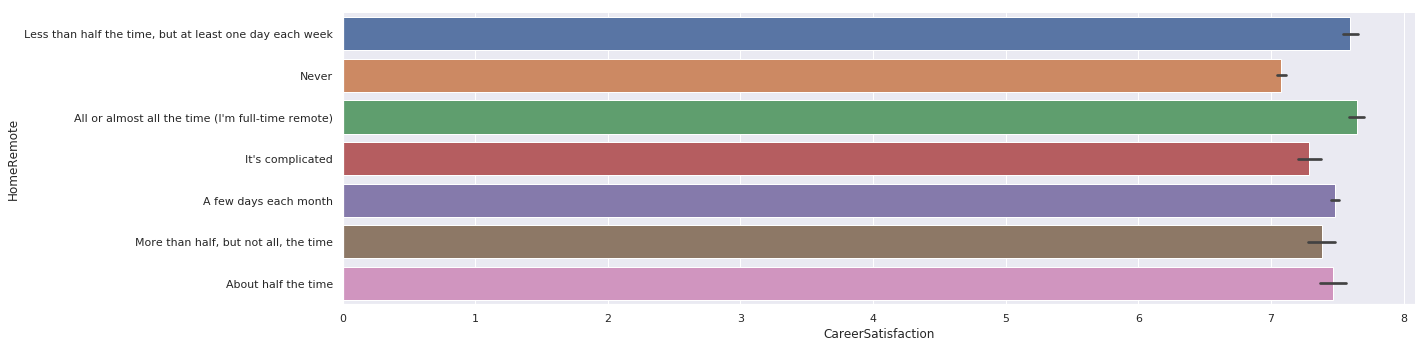

In [126]:
sns.factorplot(y='HomeRemote',x='CareerSatisfaction',data=df_js,aspect=4,kind='bar')

We can see that after vacation, which is not a surprise people value it the highest, remote working option is something developers value as one of the top benefits.

## 2.10.Programming experience vs satisfaction

Let's put the years of programming experience into bins of 5 years length

In [127]:
def Yearsexperience(years):
    if years == 'Less than a year':
        return "Less than a year"
    elif years == '2 to 3 years':
        return '2 to 5 years'
    elif years == '3 to 4 years':
        return '2 to 5 years'
    elif years == '4 to 5 years':
        return '2 to 5 years'
    elif years == '5 to 6 years':
        return '5 to 10 years'
    elif years == '6 to 7 years':
        return '5 to 10 years'
    elif years == '7 to 8 years':
        return '5 to 10 years'
    elif years == '8 to 9 years':
        return '5 to 10 years'
    elif years == '9 to 10 years':
        return '5 to 10 years'
    elif years == '10 to 11 years':
        return '10 to 15 years'
    elif years == '11 to 12 years':
        return '10 to 15 years'
    elif years == '12 to 13 years':
        return '10 to 15 years'
    elif years == '13 to 14 years':
        return '10 to 15 years'
    elif years == '14 to 15 years':
        return '10 to 15 years'
    elif years == '15 to 16 years':
        return 'Over 15 years'
    elif years == '16 to 17 years':
        return 'Over 15 years'
    elif years == '17 to 18 years':
        return 'Over 15 years'
    elif years == '18 to 19 years':
        return 'Over 15 years'
    elif years == '20 or more years':
        return 'Over 15 years'
    else:
        return 'Unknown'

In [128]:
df_js['YearsProgram_bin'] = df_js['YearsProgram'].apply(Yearsexperience)
df_js['YearsCoded_bin'] = df_js['YearsCodedJob'].apply(Yearsexperience)

Plot out Career Satisfaction vs. Years of Programming experience

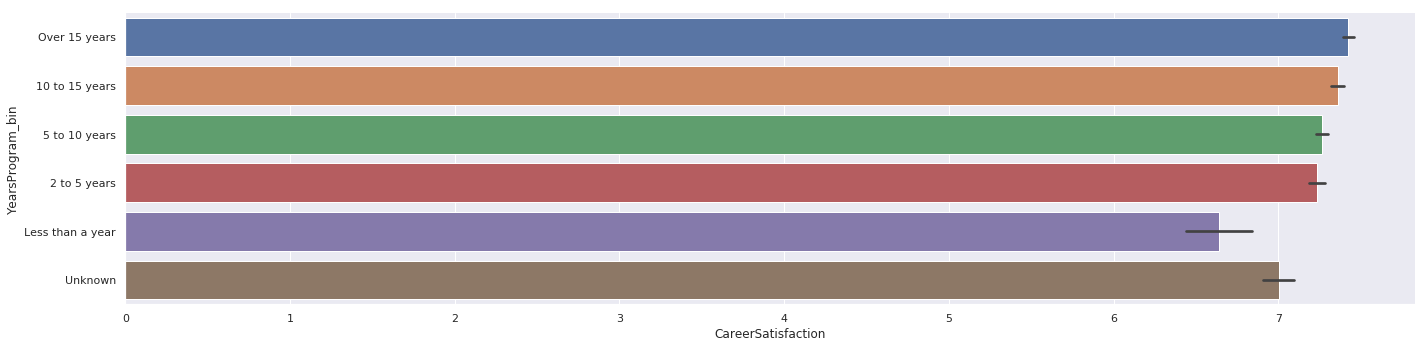

In [129]:
sns.factorplot(y='YearsProgram_bin',x='CareerSatisfaction',data=df_js,aspect=4,kind='bar')

We see that in general, the more experienced developers are with programming, the more satisfied they are. Also noticed that developers/new developers with less than a year programming experience are less satisfied with their career

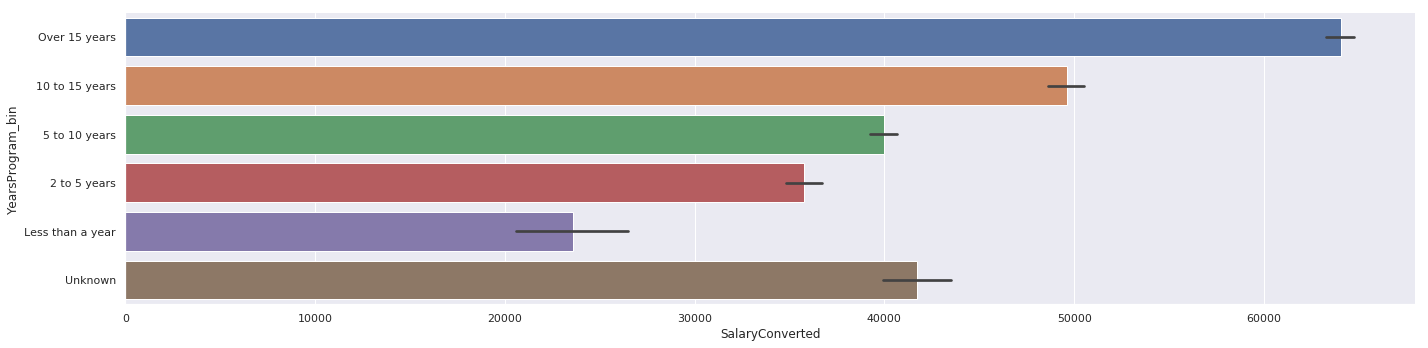

In [130]:
sns.factorplot(y='YearsProgram_bin',x='SalaryConverted',data=df_js,aspect=4,kind='bar')

In [131]:
df_js.groupby('YearsProgram_bin').SalaryConverted.median()

YearsProgram_bin
10 to 15 years     55518.860
2 to 5 years       22948.790
5 to 10 years      39414.538
Less than a year     403.940
Over 15 years      69477.204
Unknown            38810.918
Name: SalaryConverted, dtype: float64

Similarly, the more the experienced developers are, the more salary they make. 

## 3.Data wrangling and feature engineering

## 3.1.Data wrangling

Besides salary, remote option, years of program experience, which were the findings from above sections,  added respondents education, country, years coded, gender, the highest education parents received, tabs spaces, and pronounce GIF, because through the single column analysis, it was foundhat these features have the most impact on job satisfaction.

Not including country in the features as there are too many countries and it will create too many variables.

In [132]:
df_ML = df_js_no_zero_sal.loc[:, [ 'FormalEducation', 'HomeRemote','YearsProgram_bin',  'CareerSatisfaction', 'PronounceGIF',\
                 'TabsSpaces', 'Gender', 'HighestEducationParents','SalaryConverted' ]]

In [133]:
df_ML['YearsProgram_bin'] = df_js.YearsProgram_bin

**Further simpilfying the data to make it ML ready**

Cleaning up Gender column

In [134]:
df_ML.Gender.fillna('Other', inplace=True)
df_ML.loc[df_ML['Gender'].str.contains('Transgender'), 'Gender'] = 'Transgender'
df_ML.loc[df_ML['Gender'].str.contains('Female'), 'Gender'] = 'Female'
df_ML.loc[df_ML['Gender'].str.contains('Male'), 'Gender'] = 'Male'
df_ML.loc[df_ML['Gender'].str.contains('Other'), 'Gender'] = 'Other'

Cleaning up Formal Education column

In [135]:
df_ML.FormalEducation = df_ML.FormalEducation.apply(lambda x: 'Bachelors' if x=='Bachelor\'s degree'
                           else 'Masters' if x=='Master\'s degree'
                           else 'HighSchool' if x=='Some college/university study without earning a bachelor\'s degree'
                           else 'HighSchool' if x=='Secondary school'
                           else 'PhD' if x=='Doctoral degree'
                           else 'Masters' if x=='Professional degree'
                           else 'Other' if x=='I prefer not to answer'
                           else 'Elementary' if x=='Primary/elementary school'
                           else 'NoEducation' if x=='I never completed any formal education'
                           else x)

Cleaning up Highest education by parents column

In [136]:
df_ML.HighestEducationParents = df_ML.HighestEducationParents.apply(lambda x: 'Bachelors' if x=='A bachelor\'s degree'
                           else 'Masters' if x=='A master\'s degree'
                           else 'HighSchool' if x=='Some college/university study, no bachelor\'s degree'
                           else 'HighSchool' if x=='High school'
                           else 'PhD' if x=='A doctoral degree'
                           else 'Masters' if x=='A professional degree'
                           else 'Other' if x=='I prefer not to answer'
                           else 'Elementary' if x=='Primary/elementary school'
                           else 'NoEducation' if x=='No education'
                                                                    else 'NoEducation' if x=='I don\'t know/not sure'
                           else x)
df_ML.HighestEducationParents.fillna('Other', inplace=True)

Categorizing HomeRemote column into few buckets

In [137]:
df_ML.HomeRemote = df_ML.HomeRemote.apply(lambda x: '>50_percent' if x=='More than half, but not all, the time'
                           else '50_percent' if x=='About half the time'
                           else '<50_percent' if x=='Less than half the time, but at least one day each week'
                           else '<50_percent' if x=='A few days each month'
                           else '100_percent' if x=='All or almost all the time (I\'m full-time remote)'
                           else 'Masters' if x=='Professional degree'
                           else 'Other' if x=='It\'s complicated'
                                                      else x)
df_ML.HomeRemote.fillna('Other', inplace=True)

Cleaning up Pronounce GIF column

In [138]:
df_ML.PronounceGIF = df_ML.PronounceGIF.apply(lambda x: 'hard_g' if x=='With a hard "g," like "gift"'
                           else 'soft_g' if x=='With a soft "g," like "jiff"'
                           else 'g-i-f' if x=='Enunciating each letter: "gee eye eff"'
                           else 'Other' if x=='Some other way'
                                                      else x)
df_ML.PronounceGIF.fillna('Other', inplace=True)

Filled nulls with Other in TabsSpaces column

In [139]:
df_ML.TabsSpaces.fillna('Other', inplace=True)

converted Yes and No to 1 and 0

In [140]:
df_ML.head(3)

,FormalEducation,HomeRemote,YearsProgram_bin,CareerSatisfaction,PronounceGIF,TabsSpaces,Gender,HighestEducationParents,SalaryConverted
2,Bachelors,<50_percent,Over 15 years,8.000,hard_g,Spaces,Male,Masters,162113.475
3,PhD,<50_percent,10 to 15 years,6.000,soft_g,Spaces,Male,PhD,89561.500
4,Masters,Never,Over 15 years,6.000,soft_g,Other,Other,Other,73054.439


Creating dummies

In [141]:
df_ML = pd.get_dummies(df_ML,columns=[ 'FormalEducation', 'HomeRemote','YearsProgram_bin', 'PronounceGIF',\
                 'TabsSpaces', 'Gender', 'HighestEducationParents' ])

In [142]:
print(len(df_ML.columns))
df_ML.head(3)

41


,CareerSatisfaction,SalaryConverted,FormalEducation_Bachelors,FormalEducation_Elementary,FormalEducation_HighSchool,FormalEducation_Masters,FormalEducation_NoEducation,FormalEducation_Other,FormalEducation_PhD,HomeRemote_100_percent,HomeRemote_50_percent,HomeRemote_<50_percent,HomeRemote_>50_percent,HomeRemote_Never,HomeRemote_Other,YearsProgram_bin_10 to 15 years,YearsProgram_bin_2 to 5 years,YearsProgram_bin_5 to 10 years,YearsProgram_bin_Less than a year,YearsProgram_bin_Over 15 years,YearsProgram_bin_Unknown,PronounceGIF_Other,PronounceGIF_g-i-f,PronounceGIF_hard_g,PronounceGIF_soft_g,TabsSpaces_Both,TabsSpaces_Other,TabsSpaces_Spaces,TabsSpaces_Tabs,Gender_Female,Gender_Gender non-conforming,Gender_Male,Gender_Other,Gender_Transgender,HighestEducationParents_Bachelors,HighestEducationParents_Elementary,HighestEducationParents_HighSchool,HighestEducationParents_Masters,HighestEducationParents_NoEducation,HighestEducationParents_Other,HighestEducationParents_PhD
2,8.000,162113.475,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,6.000,89561.500,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,6.000,73054.439,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [143]:
df_ML.isnull().any().sum()

0

Identify multi-collinearity

In [144]:
df_ML.corr().unstack().sort_values().drop_duplicates()

PronounceGIF_soft_g                 PronounceGIF_hard_g                  -0.892
Gender_Male                         Gender_Other                         -0.843
                                    HighestEducationParents_Other        -0.784
                                    TabsSpaces_Other                     -0.654
HomeRemote_Never                    HomeRemote_<50_percent               -0.598
TabsSpaces_Spaces                   TabsSpaces_Tabs                      -0.543
FormalEducation_Masters             FormalEducation_Bachelors            -0.527
FormalEducation_Bachelors           FormalEducation_HighSchool           -0.520
YearsProgram_bin_5 to 10 years      YearsProgram_bin_Over 15 years       -0.441
Gender_Female                       Gender_Male                          -0.385
YearsProgram_bin_10 to 15 years     YearsProgram_bin_Over 15 years       -0.355
TabsSpaces_Spaces                   TabsSpaces_Other                     -0.327
HighestEducationParents_HighSchool  High

In [145]:
#drop _other columns as they seem to be redundant
high_corr_cols = ['Gender_Other', 'HighestEducationParents_Other','TabsSpaces_Other', 'HomeRemote_Other','PronounceGIF_Other', 'FormalEducation_Other','YearsProgram_bin_Unknown', 'PronounceGIF_soft_g']
df_ML.drop(high_corr_cols,axis =1, inplace=True)

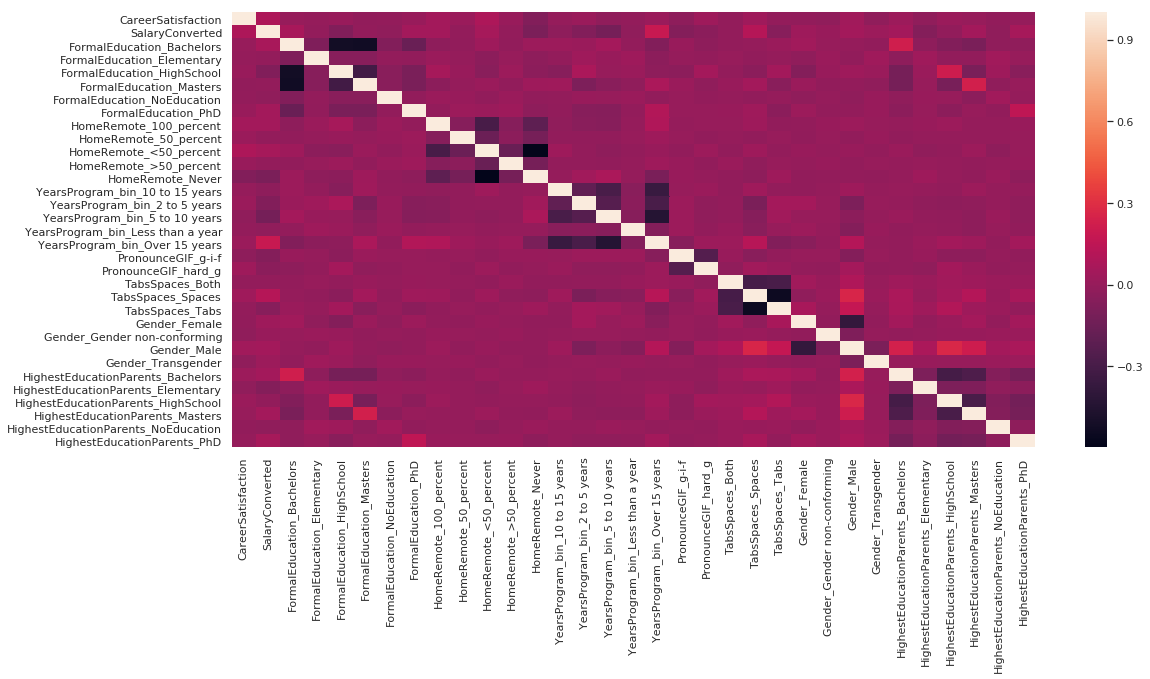

In [146]:
#correlation heat map
sns.heatmap(df_ML.corr())

No strong correlation found from the heat map

In [147]:
df_ML.var().sort_values(ascending=False).head(5)

SalaryConverted             1310250485.306
CareerSatisfaction                   3.284
FormalEducation_Bachelors            0.249
HomeRemote_<50_percent               0.248
TabsSpaces_Spaces                    0.231
dtype: float64

Salary and career satisfaction variables have high variablility compared to rest of the variables.

## 3.2.Feature selection

In [148]:
from sklearn.ensemble import RandomForestRegressor

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

Text(0.5,1,'Feature Importances with target variable as CareerSatisfaction')

<BarContainer object of 15 artists>

([<matplotlib.axis.YTick at 0x7f8002fb55c0>,
 <a list of 15 Text yticklabel objects>)

Text(0.5,0,'Relative Importance')

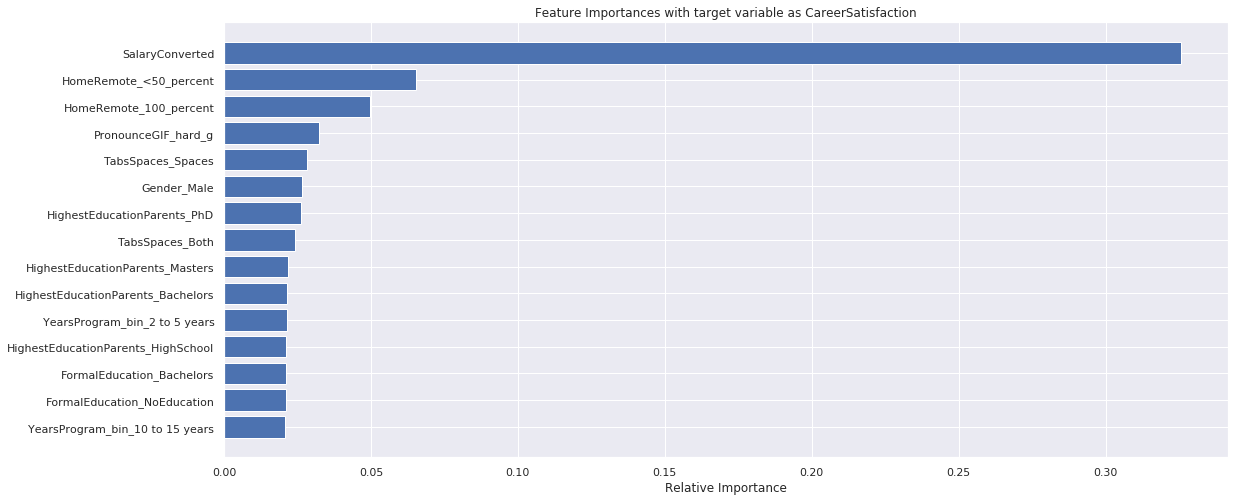

In [149]:
#identify feature importance using RandomForestRegressor
# treat CareerSatisfaction as target variable

df_no_cs = df_ML.drop('CareerSatisfaction', axis=1)

model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df_no_cs,df_ML.CareerSatisfaction)

features = df_no_cs.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 10 features
plt.title('Feature Importances with target variable as CareerSatisfaction')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

Text(0.5,1,'Feature Importances with target variable as Salary')

<BarContainer object of 15 artists>

([<matplotlib.axis.YTick at 0x7f8003037b00>,
 <a list of 15 Text yticklabel objects>)

Text(0.5,0,'Relative Importance')

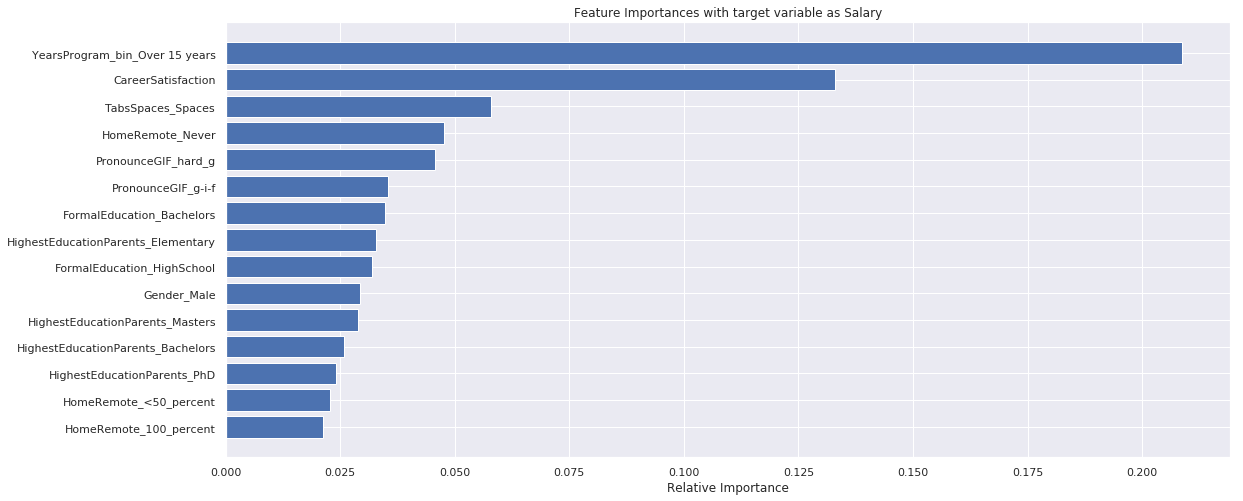

In [150]:
# treat CareerSatisfaction as target variable
df_no_sal = df_ML.drop('SalaryConverted', axis=1)

model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df_no_sal,df_ML.SalaryConverted)

features = df_no_sal.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 10 features
plt.title('Feature Importances with target variable as Salary')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

Text(0.5,1,'Feature Importances without CareerSatisfaction and Salary')

<BarContainer object of 15 artists>

([<matplotlib.axis.YTick at 0x7f8003e0ab00>,
 <a list of 15 Text yticklabel objects>)

Text(0.5,0,'Relative Importance')

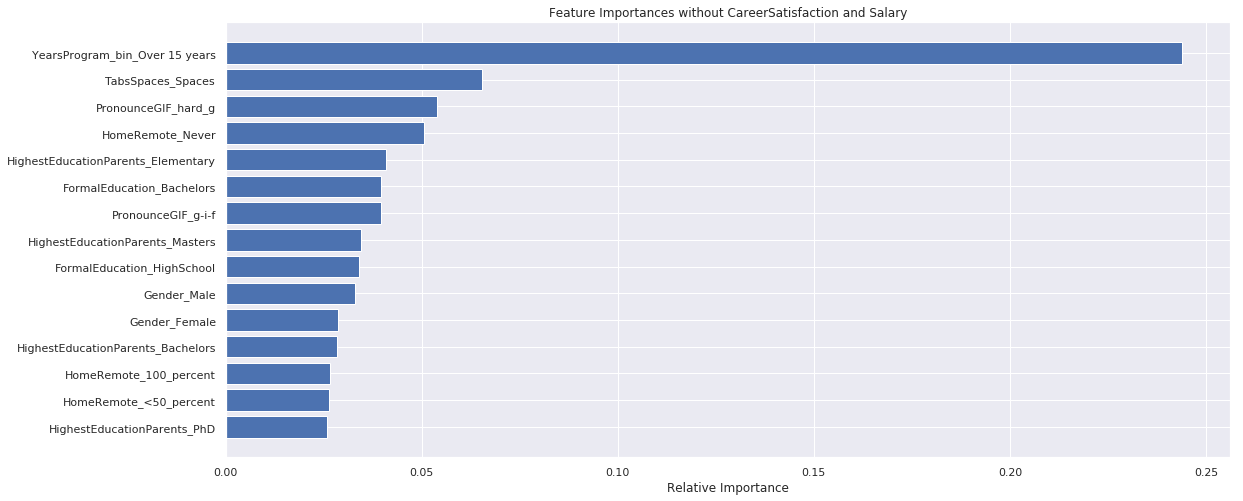

In [151]:
#treat both CareerSatisfaction and SalaryConverted as target variables
df_no_sal_no_cs = df_no_cs.drop('SalaryConverted', axis=1)

model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(df_no_sal_no_cs,df_ML.SalaryConverted)

features = df_no_sal_no_cs.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-15:]  # top 10 features
plt.title('Feature Importances without CareerSatisfaction and Salary')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## 3.3.PCA analysis

In [152]:
from sklearn.decomposition import PCA

Normalize features salary and career satisfaction

In [153]:
df_scaled = df_ML.copy()
df_scaled.head(3)

,CareerSatisfaction,SalaryConverted,FormalEducation_Bachelors,FormalEducation_Elementary,FormalEducation_HighSchool,FormalEducation_Masters,FormalEducation_NoEducation,FormalEducation_PhD,HomeRemote_100_percent,HomeRemote_50_percent,HomeRemote_<50_percent,HomeRemote_>50_percent,HomeRemote_Never,YearsProgram_bin_10 to 15 years,YearsProgram_bin_2 to 5 years,YearsProgram_bin_5 to 10 years,YearsProgram_bin_Less than a year,YearsProgram_bin_Over 15 years,PronounceGIF_g-i-f,PronounceGIF_hard_g,TabsSpaces_Both,TabsSpaces_Spaces,TabsSpaces_Tabs,Gender_Female,Gender_Gender non-conforming,Gender_Male,Gender_Transgender,HighestEducationParents_Bachelors,HighestEducationParents_Elementary,HighestEducationParents_HighSchool,HighestEducationParents_Masters,HighestEducationParents_NoEducation,HighestEducationParents_PhD
2,8.000,162113.475,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
3,6.000,89561.500,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,6.000,73054.439,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [154]:
scaler = StandardScaler()
df_scaled['cscaled'] = scaler.fit_transform(df_scaled[['CareerSatisfaction']])
df_scaled['sscaled'] = scaler.fit_transform(df_scaled[['SalaryConverted']])
df_scaled.drop(['CareerSatisfaction','SalaryConverted'], axis=1, inplace=True)
df_scaled.head(2)

,FormalEducation_Bachelors,FormalEducation_Elementary,FormalEducation_HighSchool,FormalEducation_Masters,FormalEducation_NoEducation,FormalEducation_PhD,HomeRemote_100_percent,HomeRemote_50_percent,HomeRemote_<50_percent,HomeRemote_>50_percent,HomeRemote_Never,YearsProgram_bin_10 to 15 years,YearsProgram_bin_2 to 5 years,YearsProgram_bin_5 to 10 years,YearsProgram_bin_Less than a year,YearsProgram_bin_Over 15 years,PronounceGIF_g-i-f,PronounceGIF_hard_g,TabsSpaces_Both,TabsSpaces_Spaces,TabsSpaces_Tabs,Gender_Female,Gender_Gender non-conforming,Gender_Male,Gender_Transgender,HighestEducationParents_Bachelors,HighestEducationParents_Elementary,HighestEducationParents_HighSchool,HighestEducationParents_Masters,HighestEducationParents_NoEducation,HighestEducationParents_PhD,cscaled,sscaled
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0.296,2.817
3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,-0.807,0.813


In [155]:
df_scaled.shape

(28688, 33)

In [156]:
# consider number of pca components as 10
pca = PCA(n_components=6)
fit = pca.fit(df_scaled)
var = fit.explained_variance_ratio_
print(fit.explained_variance_ratio_)
#print(fit.components_)
#print(fit.singular_values_)

[0.19718811 0.16453967 0.07126749 0.06476729 0.06218008 0.05456898]


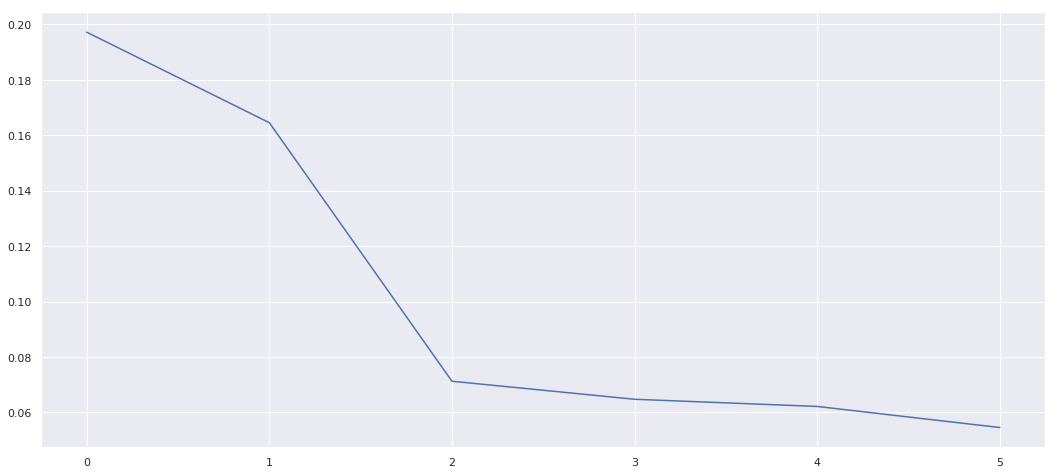

In [157]:
plt.plot(var)

[19.72 36.17 43.3  49.78 56.   61.46]


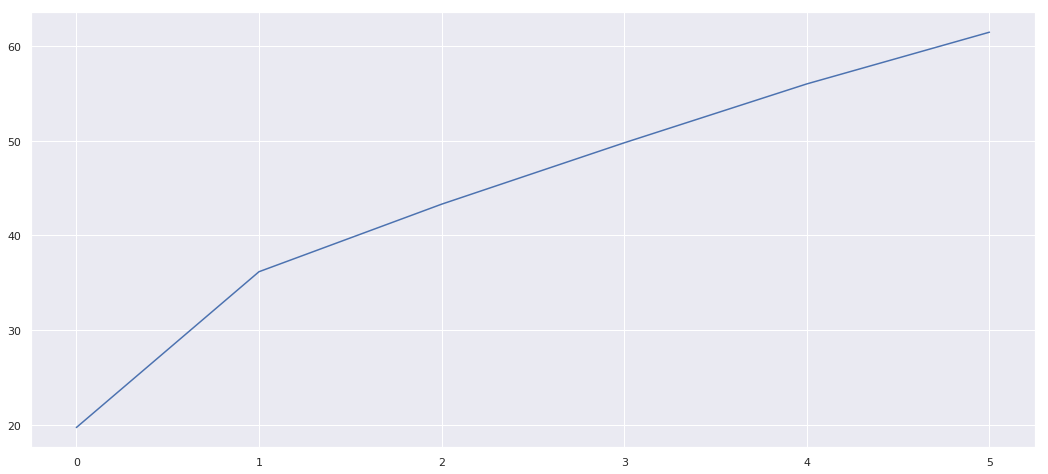

In [158]:
var1=np.cumsum(np.round(fit.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)

The 6 components explain 60% variance

In [159]:
df_pca = pca.transform(df_scaled)
print(df_pca.shape)
df_pca[0:3]

(28688, 6)


array([[ 2.51637787,  1.71716796, -0.16837216, -0.66198407, -0.24993693,
        -0.08817973],
       [ 0.18766401,  1.17055664, -0.42282155, -0.64961987, -0.03700891,
         0.26211255],
       [-0.32812511,  0.92490893, -0.45163323,  0.78362653, -0.31479782,
         0.8642549 ]])

([<matplotlib.axis.YTick at 0x7f8003e73cc0>,
 <a list of 6 Text yticklabel objects>)

([<matplotlib.axis.XTick at 0x7f8003e75d68>,
 <a list of 33 Text xticklabel objects>)

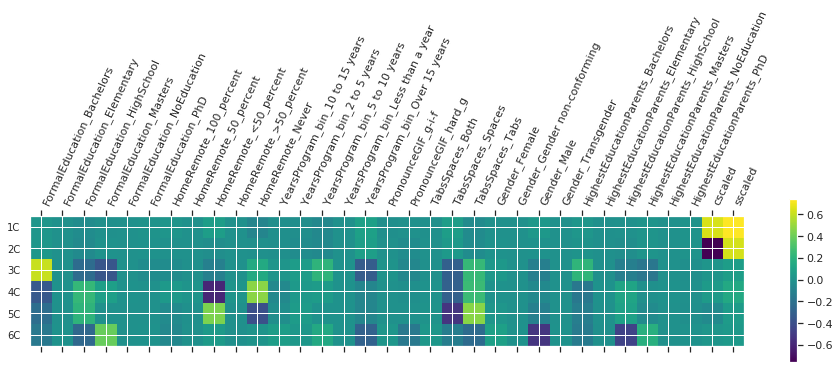

In [160]:
#mat plot the components 
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5],['1C','2C','3C', '4C', '5C', '6C'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df_scaled.columns)),df_scaled.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

Text(0.225552,0.207936,'FormalEducation_Bachelors')

Text(-0.00636024,-0.00515964,'FormalEducation_Elementary')

Text(-0.213209,-0.270488,'FormalEducation_HighSchool')

Text(-0.0377194,0.0450164,'FormalEducation_Masters')

Text(-0.0113629,-0.00589478,'FormalEducation_NoEducation')

Text(0.0614474,0.0378863,'FormalEducation_PhD')

Text(0.15504,0.00108828,'HomeRemote_100_percent')

Text(0.00330691,-0.0145827,'HomeRemote_50_percent')

Text(0.551497,-0.101629,'HomeRemote_<50_percent')

Text(-0.00119727,-0.014926,'HomeRemote_>50_percent')

Text(-0.575425,-0.035175,'HomeRemote_Never')

Text(-0.0870378,-0.0648676,'YearsProgram_bin_10 to 15 years')

Text(-0.149399,-0.185046,'YearsProgram_bin_2 to 5 years')

Text(-0.446246,-0.302154,'YearsProgram_bin_5 to 10 years')

Text(-0.0165078,-0.00435562,'YearsProgram_bin_Less than a year')

Text(0.719805,0.543341,'YearsProgram_bin_Over 15 years')

Text(-0.0735084,-0.0190541,'PronounceGIF_g-i-f')

Text(-0.0191051,-0.186655,'PronounceGIF_hard_g')

Text(-0.0362688,0.00295097,'TabsSpaces_Both')

Text(0.550402,0.291738,'TabsSpaces_Spaces')

Text(-0.256893,-0.203344,'TabsSpaces_Tabs')

Text(0.0103446,0.0485644,'Gender_Female')

Text(-0.00208085,0.00759217,'Gender_Gender non-conforming')

Text(0.309967,0.0224305,'Gender_Male')

Text(0.00123276,0.01295,'Gender_Transgender')

Text(0.198445,0.0810401,'HighestEducationParents_Bachelors')

Text(-0.06615,-0.0272507,'HighestEducationParents_Elementary')

Text(0.00458732,-0.112015,'HighestEducationParents_HighSchool')

Text(0.141059,0.121327,'HighestEducationParents_Masters')

Text(-0.0237525,-0.00076547,'HighestEducationParents_NoEducation')

Text(0.0742751,0.0659709,'HighestEducationParents_PhD')

Text(4.89085,-4.94143,'cscaled')

Text(5.56944,4.17894,'sscaled')

Text(3.01965,2.0606,'2')

Text(0.225197,1.40467,'3')

Text(-0.39375,1.10989,'4')

Text(0.578318,0.826971,'6')

Text(-1.33724,-0.766057,'7')

Text(0.856235,0.299405,'10')

Text(-0.197119,-0.67218,'11')

Text(-1.46972,2.61203,'12')

Text(2.4138,1.59091,'14')

Text(0.878075,0.288151,'15')

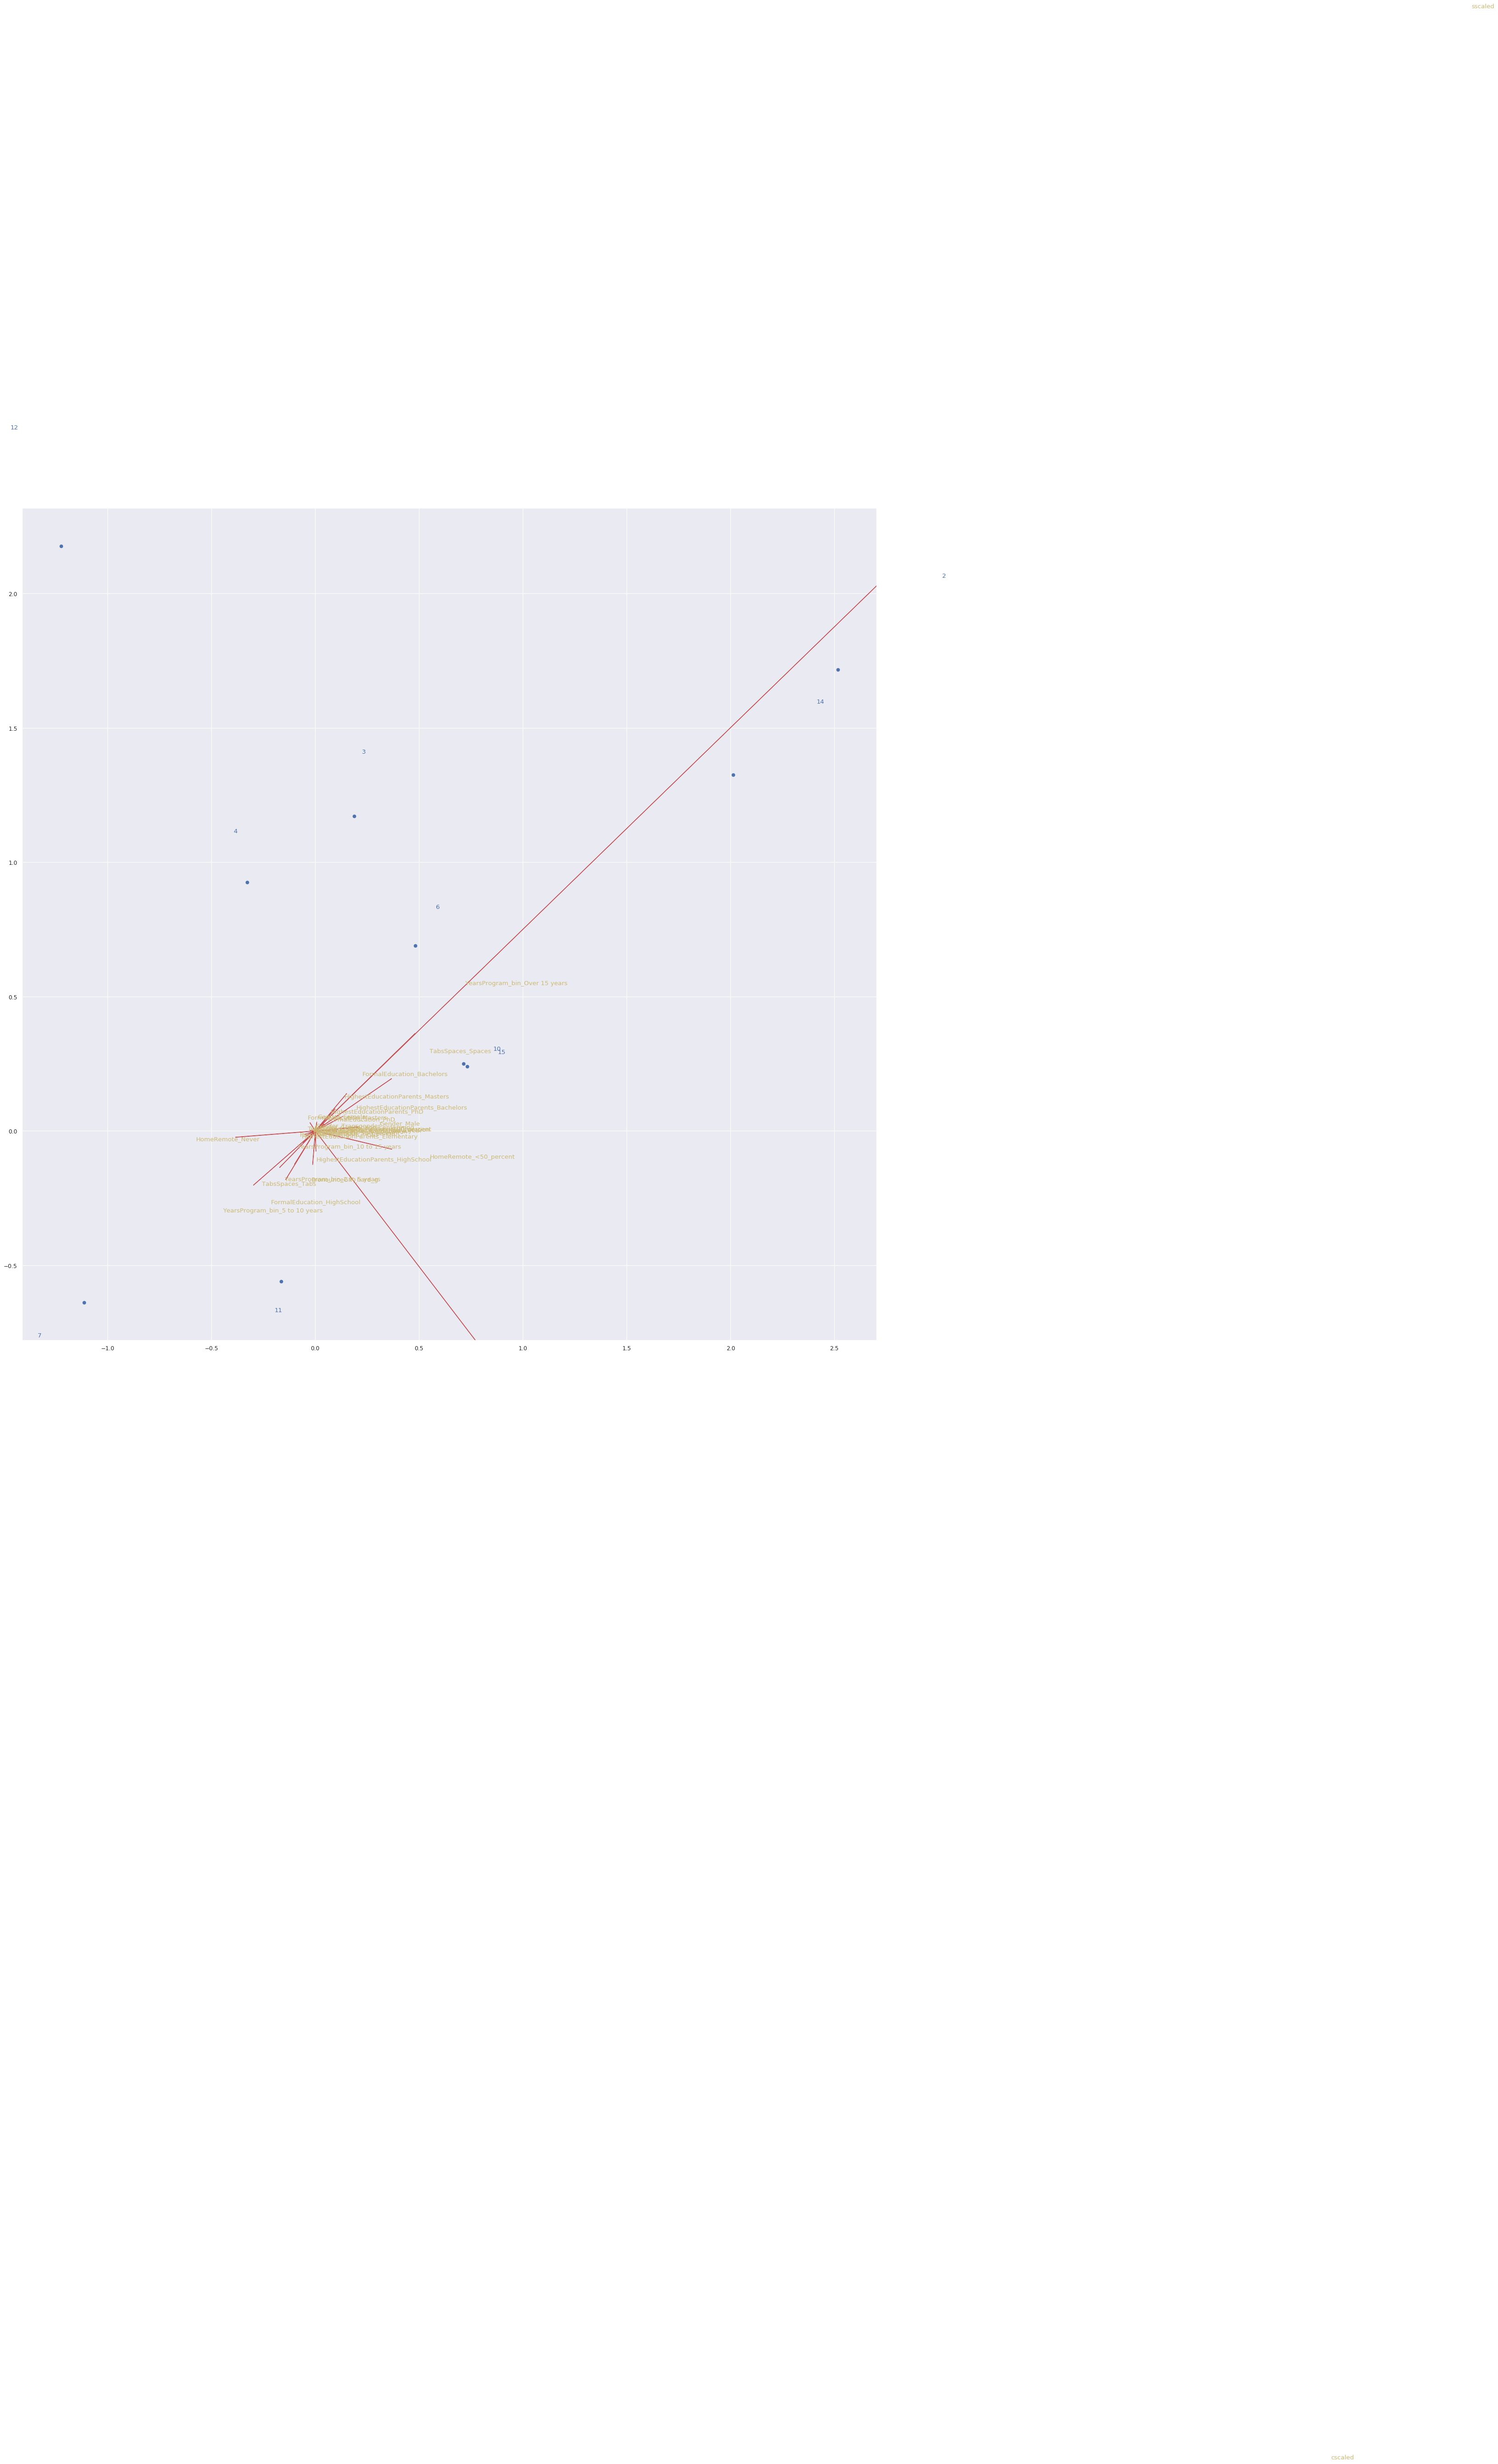

In [161]:
# plot the vector lengths to see relative importance
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(df_scaled)[0:10,0] 
ys = pca.transform(df_scaled)[0:10,1]

fig=plt.figure(figsize=(30, 30), dpi= 80, facecolor='w', edgecolor='k')

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs)*2, yvector[i]*max(ys)*2,
              color='r', width=0.001, head_width=0.001)
    plt.text(xvector[i]*max(xs)*3, yvector[i]*max(ys)*3,
             list(df_scaled.columns.values)[i], color='y')

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.2, ys[i]*1.2, list(df_scaled.index)[i], color='b')

plt.show()    

## 4.Machine Learning

remove low rank columns based on pca analysis and RandomForest regressor, and rename the columns that have special characters as it will cause some models to error out.

In [162]:
low_rank_cols = [ 'HighestEducationParents_Bachelors','HighestEducationParents_HighSchool','HighestEducationParents_Masters','HighestEducationParents_NoEducation','HighestEducationParents_PhD']

df_ML.drop(low_rank_cols,axis =1, inplace=True)

df_ML.rename({'HomeRemote_<50_percent': 'HomeRemote_lt_50_percent', 'HomeRemote_>50_percent': 'HomeRemote_gt_50_percent'}, axis='columns', inplace=True)

## 4.1.Clustering

After several iterations of clustering using KMeans, Agglomerative, DBSCAN, HDBSCAN, MeanShift algorithms and with different hyperparameters such as number of clusters, distance metric etc, KMeans with K=3 performed best in terms of logical grouping, cluster metrics and speed. 

In [163]:
from sklearn.cluster import KMeans
from sklearn import metrics
from mpl_toolkits import mplot3d

In [164]:
df_cluster = df_ML.copy()

In [165]:
# scale salary and career satisfaction variables
scaler = StandardScaler()
df_cluster['SalaryScaled'] = scaler.fit_transform(df_cluster[['SalaryConverted']])
df_cluster['cscaled'] = scaler.fit_transform(df_cluster[['CareerSatisfaction']])
df_cluster.drop('SalaryConverted',axis=1,inplace=True)
df_cluster.drop('CareerSatisfaction',axis=1,inplace=True)

Text(0.5,0,'k')

Text(0,0.5,'wsse')

Text(0.5,1,'Elbow Method For Optimal k')

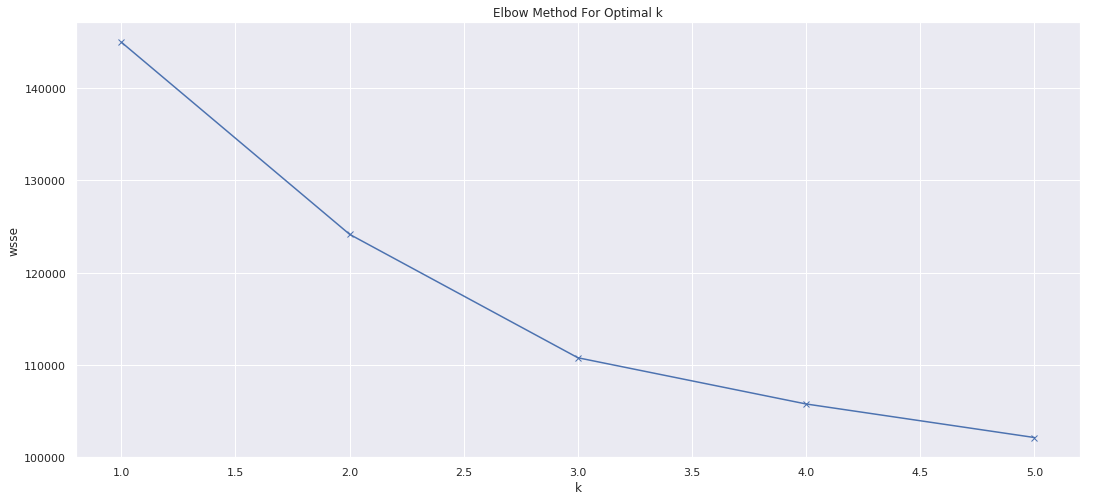

In [166]:
#plot elbow curve
wsse = []
K = range(1,6)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_cluster)
    wsse.append(km.inertia_)

plt.plot(K, wsse, 'bx-')
plt.xlabel('k')
plt.ylabel('wsse')
plt.title('Elbow Method For Optimal k')
plt.show()

K=3 seems to be optimal as per the elbow curve

In [167]:
# find out which K has highest silhouette coefficient
for k in range(2,6):
  kmeans = KMeans(n_clusters=k)
  labels = kmeans.fit_predict(df_cluster)
  centers = kmeans.cluster_centers_
  sil = metrics.silhouette_score(df_cluster,labels)
  db = metrics.davies_bouldin_score(df_cluster, labels) 
  print(k,sil, db)  

2 0.13469207273767408 2.3933561366140004
3 0.13300681183184862 2.0903621688665344
4 0.10089416453902954 2.499953424383018
5 0.0863993599794145 2.7463269977453617


K=2 has the highest silhouette score, but K=3 has lowest davies_bouldin_score and elbow method showed 3 clusters, so going with K=3

In [168]:
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(df_cluster)
centers = kmeans.cluster_centers_
sil = metrics.silhouette_score(df_cluster,labels)
db = metrics.davies_bouldin_score(df_cluster, labels) 
print(sil, db)
df_cluster['label'] = labels

0.13300681183184862 2.0903621688665344


Text(0.5,1,'K-Means Clustering')

Text(0.5,0,'CareerSatisfaction')

Text(0,0.5,'SalaryScaled')

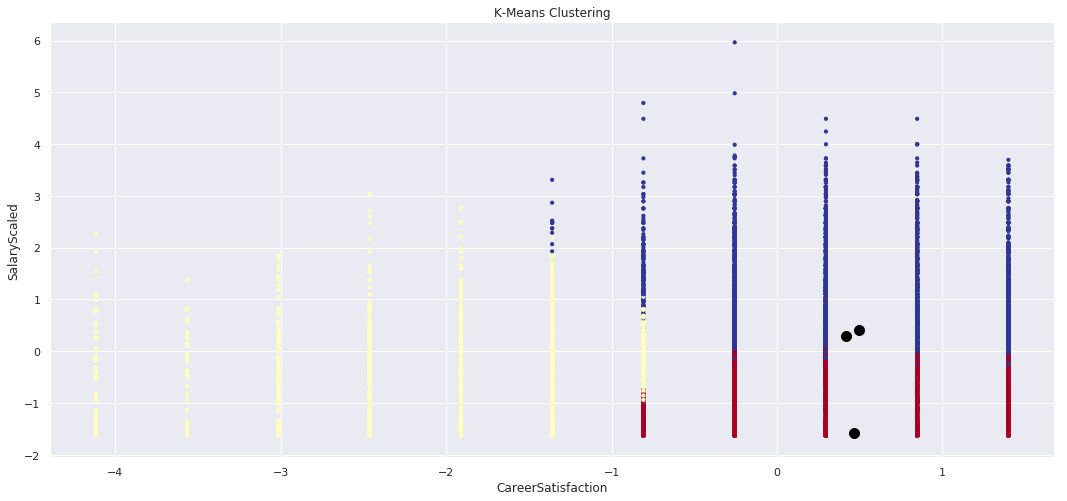

In [169]:
#plot the clusters
fig = plt.figure()
cm = plt.cm.get_cmap('RdYlBu')
ax = fig.add_subplot(111)
scatter = ax.scatter(df_cluster['cscaled'],df_cluster['SalaryScaled'],
                     c=df_cluster['label'],s=10, cmap=cm)
scatter = ax.scatter(centers[:,0],centers[:,-1],
                     c='black',s=100, cmap=cm)
ax.set_title('K-Means Clustering')
ax.set_xlabel('CareerSatisfaction')
ax.set_ylabel('SalaryScaled')

Text(0.5,0.92,'K-Means Clustering')

Text(0.5,0,'CareerSatisfaction')

Text(0.5,0,'SalaryScaled')

Text(0.5,0,'Years Programming')

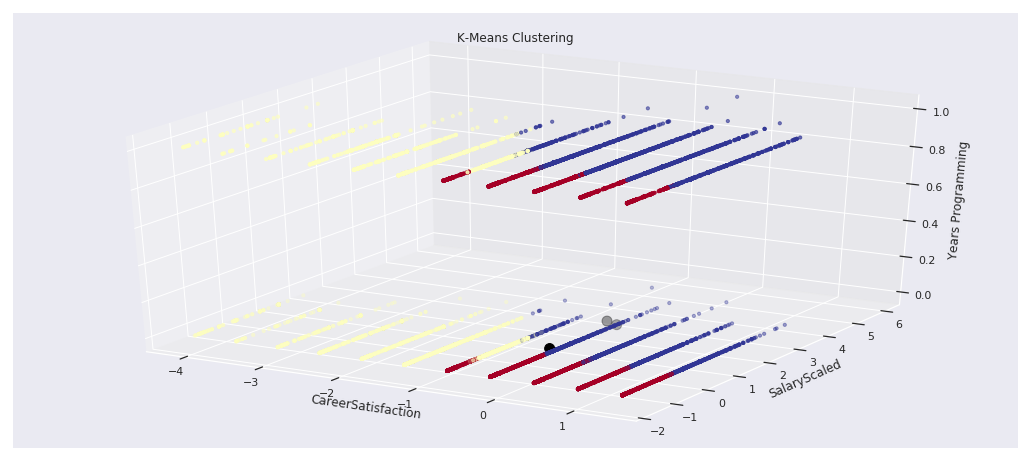

In [170]:
#3D plotting
fig = plt.figure()
cm = plt.cm.get_cmap('RdYlBu')
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(df_cluster['cscaled'],df_cluster['SalaryScaled'],df_cluster['YearsProgram_bin_Over 15 years'],
                     c=df_cluster['label'],s=10, cmap=cm)
scatter = ax.scatter3D(centers[:,0],centers[:,-1],centers[:,11],
                     c='black',s=100, cmap=cm)
ax.set_title('K-Means Clustering')
ax.set_xlabel('CareerSatisfaction')
ax.set_ylabel('SalaryScaled')
ax.set_zlabel('Years Programming')

From the plots, three clusters emerge: 
> cluster 1  = high sal, high career satisfaction, cluster 2  = high career satisfaction but low sal, , cluster 3 = everyone with low career satisfaction

## 4.2.Classification

Use the labels from clustering for classfication.

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [172]:
df_cluster.rename({'HomeRemote_<50_percent': 'HomeRemote_lt_50_percent', 'HomeRemote_>50_percent': 'HomeRemote_gt_50_percent'}, axis='columns', inplace=True)

In [173]:
X = df_cluster.drop(['label'],axis=1)
Y = df_cluster['label']

In [174]:
#train test split
X_train, X_test, Y_train, Y_test = \
train_test_split(X,Y,test_size=0.33,random_state = 0)

In [175]:
#use 10 folds for cross validation
nfolds = 10
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

clfs = [DecisionTreeClassifier(), RandomForestClassifier(n_jobs=-1), GaussianNB(),KNeighborsClassifier(n_neighbors = 5),
        sk.linear_model.LogisticRegression(n_jobs=-1), AdaBoostClassifier(),
        LinearDiscriminantAnalysis(n_components=3),SVC(),XGBClassifier(),MLPClassifier()]

In [177]:
#find the best classifier using f1_micro score`
score_cols = ['Classifier', 'f_micro']
score_df = pd.DataFrame(columns=score_cols)

maxf1 = -1
bestCL = ""
for cl in clfs:
    fmicro = sk.model_selection.cross_val_score(cl,X_train,Y_train,cv=kf,n_jobs=-1,scoring='f1_micro').mean()
    print (str(cl) + ' ' + str(fmicro))
    score_df.loc[len(score_df)] = [str(cl),fmicro]
    if fmicro > maxf1:
        bestCL = cl
        maxf1 = fmicro
print('***********************************************')
print ('Best is... ' + str(bestCL) + ' ' + str(maxf1))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 0.9892299687825181
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 0.9870967741935484
GaussianNB(priors=None, var_smoothing=1e-09) 0.8377731529656607
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_nei

In [178]:
score_df

,Classifier,f_micro
0,"DecisionTreeClassifier(class_weight=None, crit...",0.989
1,"RandomForestClassifier(bootstrap=True, class_w...",0.987
2,"GaussianNB(priors=None, var_smoothing=1e-09)",0.838
3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.928
4,"LogisticRegression(C=1.0, class_weight=None, d...",0.985
5,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.902
6,"LinearDiscriminantAnalysis(n_components=3, pri...",0.949
7,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.984
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.991
9,"MLPClassifier(activation='relu', alpha=0.0001,...",0.996


MLP classifier got highest training score. let's evaluate the models with test data to see how they fare on new data.

 **evaluation of classifiers with test dataset**

In [179]:
cla_score_cols = ['classifier', 'mco','accu_score','bal_score', 'f1_micro', 'f1_macro' ]
cla_test_score_df = pd.DataFrame(columns=cla_score_cols)

In [180]:
for cl in clfs:
    cl.fit(X_train,Y_train)
    Y_pred = cl.predict(X_test)
    mco = metrics.matthews_corrcoef(Y_test,Y_pred)
    asc = metrics.accuracy_score(Y_test,Y_pred)
    ba =  metrics.balanced_accuracy_score(Y_test,Y_pred)
    fmicro = metrics.f1_score(Y_test,Y_pred, average='micro')
    fmacro = metrics.f1_score(Y_test,Y_pred,average='macro')
    
    cla_test_score_df.loc[len(cla_test_score_df)] = [str(cl),mco,asc,ba,fmicro,fmacro]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

GaussianNB(priors=None, var_smoothing=1e-09)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

LinearDiscriminantAnalysis(n_components=3, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [181]:
cla_test_score_df

,classifier,mco,accu_score,bal_score,f1_micro,f1_macro
0,"DecisionTreeClassifier(class_weight=None, crit...",0.984,0.990,0.991,0.990,0.990
1,"RandomForestClassifier(bootstrap=True, class_w...",0.980,0.988,0.988,0.988,0.987
2,"GaussianNB(priors=None, var_smoothing=1e-09)",0.738,0.837,0.785,0.837,0.799
3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.888,0.930,0.915,0.930,0.924
4,"LogisticRegression(C=1.0, class_weight=None, d...",0.980,0.987,0.983,0.987,0.986
5,"AdaBoostClassifier(algorithm='SAMME.R', base_e...",0.896,0.933,0.944,0.933,0.926
6,"LinearDiscriminantAnalysis(n_components=3, pri...",0.923,0.951,0.924,0.951,0.940
7,"SVC(C=1.0, cache_size=200, class_weight=None, ...",0.976,0.985,0.988,0.985,0.984
8,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.983,0.989,0.989,0.989,0.989
9,"MLPClassifier(activation='relu', alpha=0.0001,...",0.992,0.995,0.994,0.995,0.995


MLP Classifer performed best out of all the classifiers tested, though difference is not huge. Next to MLP is Decision tree classifier

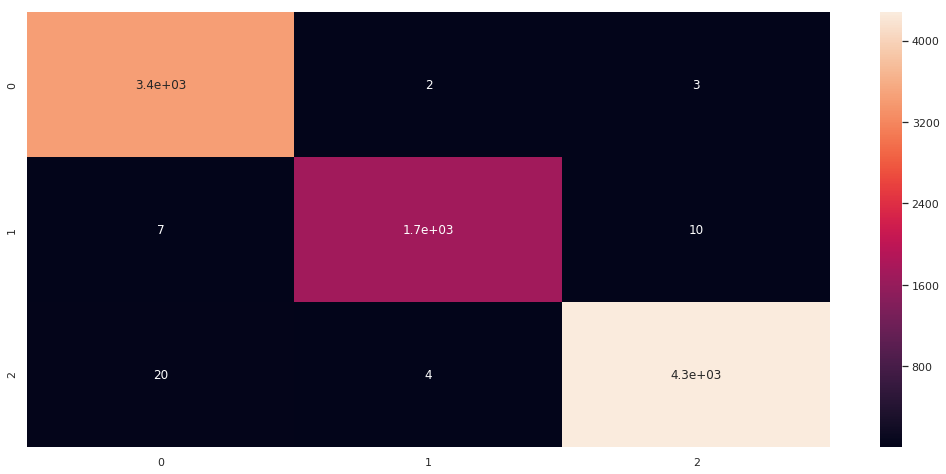

In [182]:
#confusion matrix
cm = metrics.confusion_matrix(Y_test, Y_pred)
sns.heatmap(cm, annot=True)

In [183]:
X_test['actual_label'] = Y_test
X_test['predicted_label'] = Y_pred

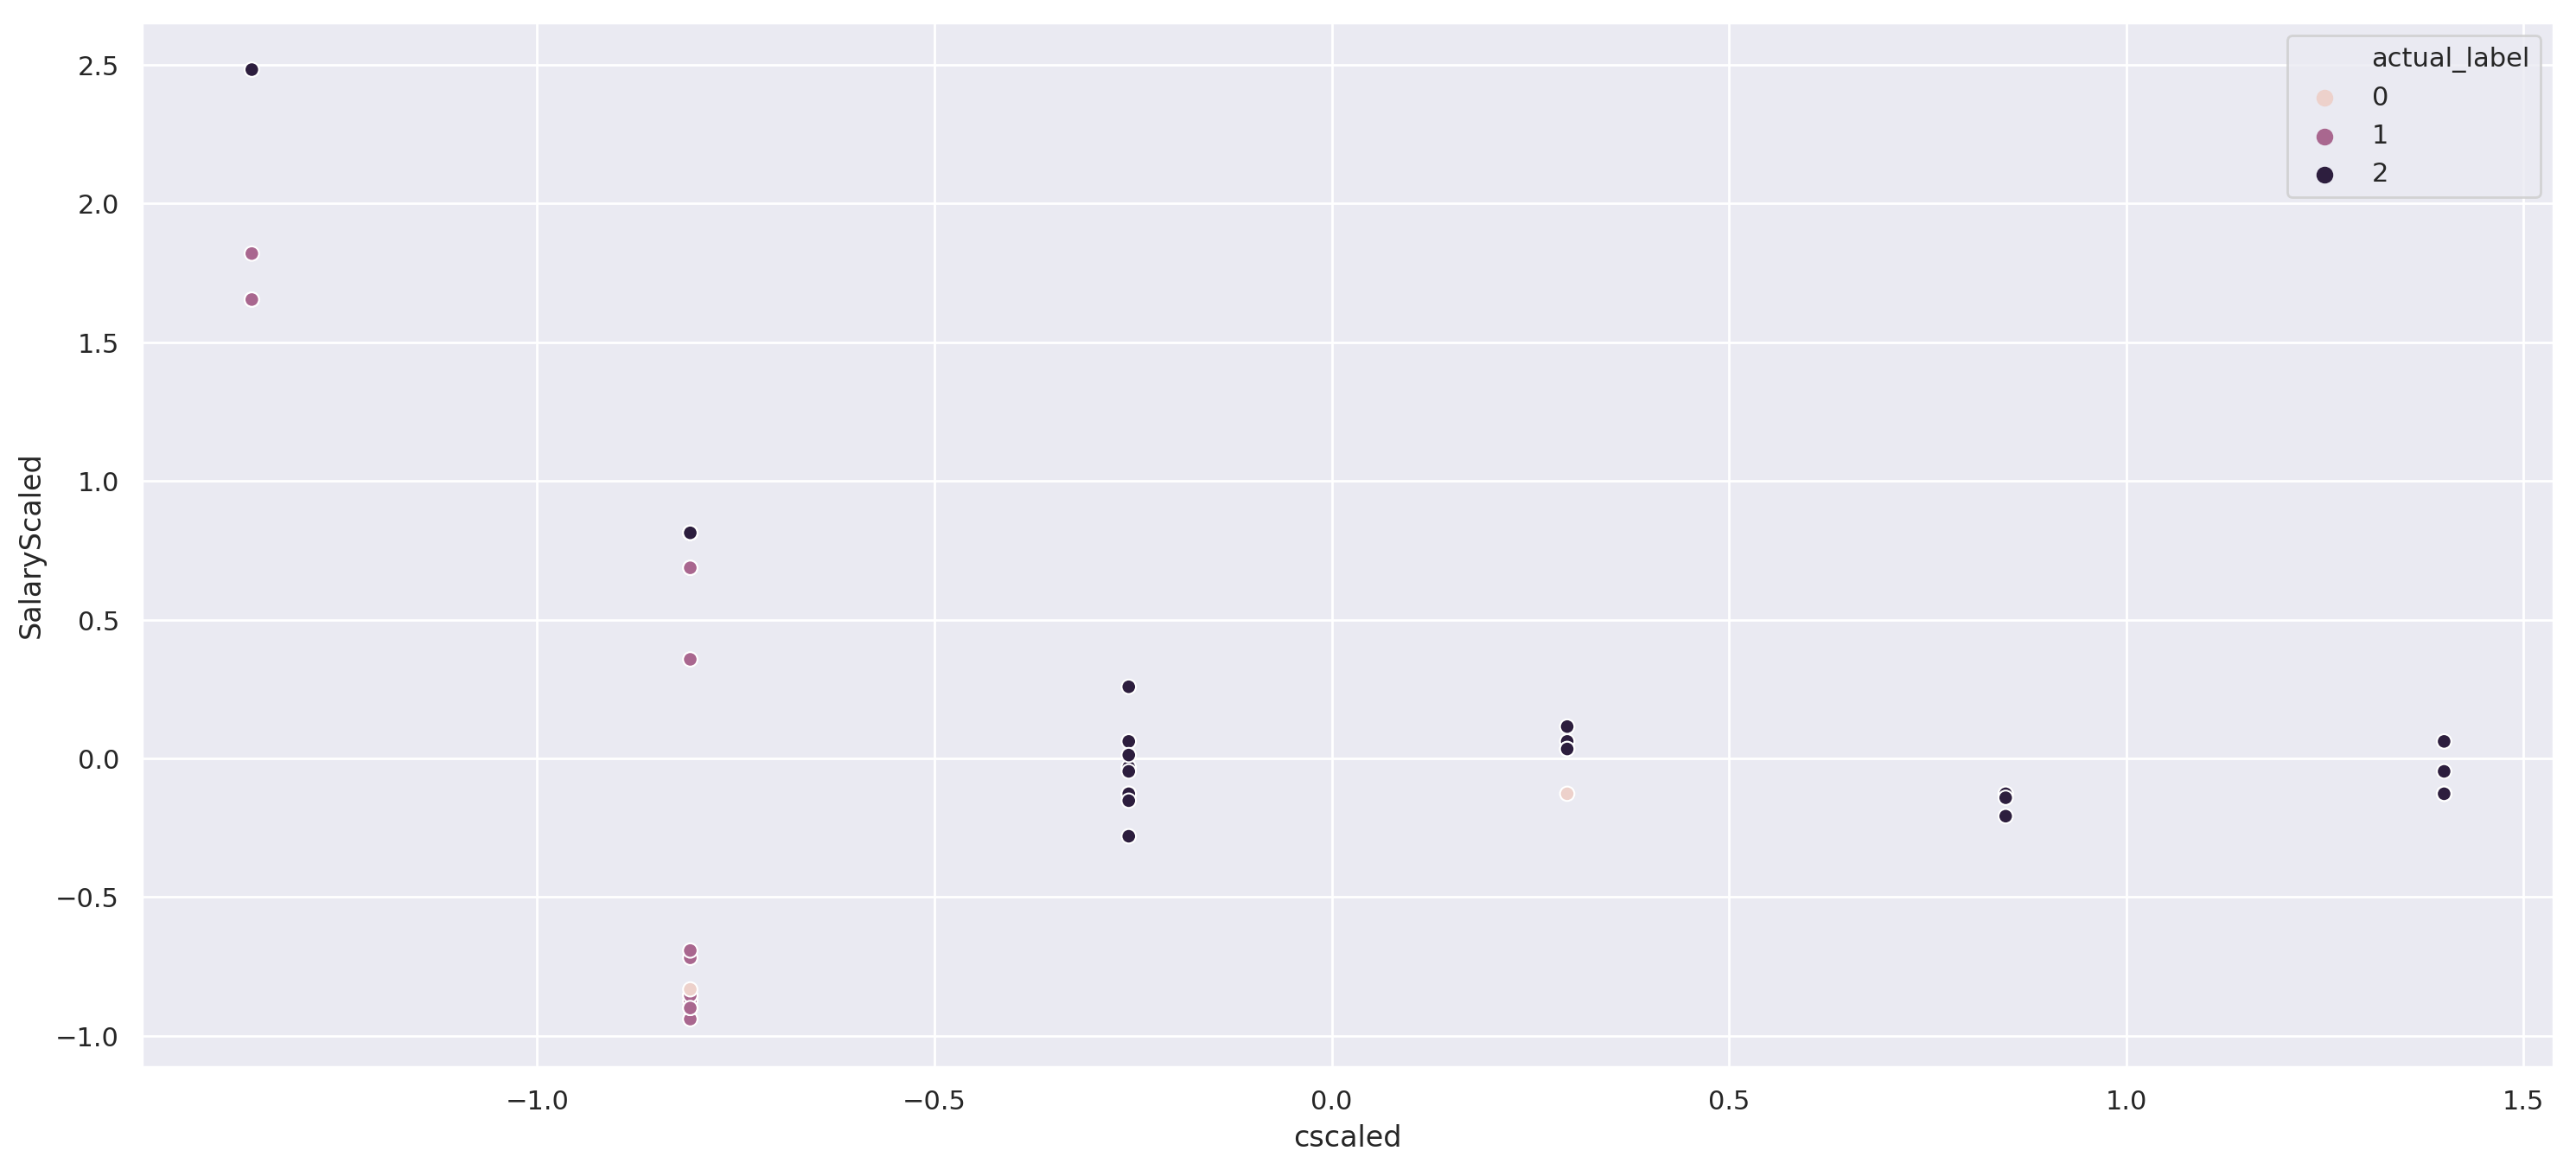

In [184]:
#plot the misclassified data points
fig=plt.figure(figsize=(18, 8), dpi= 200, facecolor='w', edgecolor='k')
sns.scatterplot(y='SalaryScaled', x='cscaled', hue = 'actual_label',data=X_test[X_test.actual_label != X_test.predicted_label])

## 4.3.Regression

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [186]:
df_reg = df_ML.copy()

In [187]:
df_reg['CountryCode'] = df_js_no_zero_sal.CountryCode # country code is needed as salary will depend upon country.
df_reg['empl_status'] = df_js_no_zero_sal.EmploymentStatus # need employment status as salaries can depend upon employment status; full time vs part time etc.

In [188]:
# encode the literal values
df_reg['empl_status'] = df_reg.empl_status.apply( lambda x: 'FT' if x == 'Employed full-time' 
                                                       else 'IC' if x == 'Independent contractor, freelancer, or self-employed'
                                                       else 'PT' if x == 'Employed part-time' else x) 

# keep only full-time, part-time and independent contractors for regression on sal
df_reg = df_reg[ (df_reg.empl_status == 'FT') | (df_reg.empl_status == 'PT') | (df_reg.empl_status == 'IC') ] 

In [189]:
df_reg.empl_status.value_counts()

FT    24193
IC     2349
PT     1197
Name: empl_status, dtype: int64

In [190]:
df_reg.SalaryConverted.corr(df_reg.CareerSatisfaction,method='pearson')

0.08676972852029001

even though it does not look like there is strong correlation between salary and career satisfaction, we will drop career satisfaction as predictor column for salary since in realistically career satisfaction wont impact the salary, though reverse may be true.

In [191]:
X = df_reg.drop(['SalaryConverted', 'CareerSatisfaction'],axis=1)
Y = df_reg['SalaryConverted']

In [192]:
X_with_countries = pd.get_dummies(X) #hot encoding of country codes
print(X_with_countries.shape)
X_with_countries.head(3)

(27739, 176)


,FormalEducation_Bachelors,FormalEducation_Elementary,FormalEducation_HighSchool,FormalEducation_Masters,FormalEducation_NoEducation,FormalEducation_PhD,HomeRemote_100_percent,HomeRemote_50_percent,HomeRemote_lt_50_percent,HomeRemote_gt_50_percent,HomeRemote_Never,YearsProgram_bin_10 to 15 years,YearsProgram_bin_2 to 5 years,YearsProgram_bin_5 to 10 years,YearsProgram_bin_Less than a year,YearsProgram_bin_Over 15 years,PronounceGIF_g-i-f,PronounceGIF_hard_g,TabsSpaces_Both,TabsSpaces_Spaces,TabsSpaces_Tabs,Gender_Female,Gender_Gender non-conforming,Gender_Male,Gender_Transgender,HighestEducationParents_Elementary,CountryCode_AFG,CountryCode_AIA,CountryCode_ALB,CountryCode_AND,CountryCode_ANT,CountryCode_ARE,CountryCode_ARG,CountryCode_ARM,CountryCode_AUS,CountryCode_AUT,CountryCode_AZE,CountryCode_BEL,CountryCode_BGD,CountryCode_BGR,CountryCode_BHR,CountryCode_BIH,CountryCode_BLR,CountryCode_BMU,CountryCode_BOL,CountryCode_BRA,CountryCode_BRB,CountryCode_BRN,CountryCode_BWA,CountryCode_CAN,CountryCode_CHE,CountryCode_CHL,CountryCode_CHN,CountryCode_CMR,CountryCode_COD,CountryCode_COL,CountryCode_CRI,CountryCode_CUB,CountryCode_CYM,CountryCode_CYP,CountryCode_CZE,CountryCode_DEU,CountryCode_DNK,CountryCode_DOM,CountryCode_DZA,CountryCode_ECU,CountryCode_EGY,CountryCode_ERI,CountryCode_ESP,CountryCode_EST,CountryCode_FIN,CountryCode_FRA,CountryCode_GBR,CountryCode_GEO,CountryCode_GHA,CountryCode_GIN,CountryCode_GRC,CountryCode_GTM,CountryCode_GUM,CountryCode_GUY,CountryCode_HKG,CountryCode_HND,CountryCode_HRV,CountryCode_HUN,CountryCode_IDN,CountryCode_IND,CountryCode_IRL,CountryCode_IRN,CountryCode_IRQ,CountryCode_ISL,CountryCode_ISR,CountryCode_ITA,CountryCode_JAM,CountryCode_JOR,CountryCode_JPN,CountryCode_KAZ,CountryCode_KEN,CountryCode_KGZ,CountryCode_KHM,CountryCode_KOR,CountryCode_KWT,CountryCode_LBN,CountryCode_LCA,CountryCode_LIE,CountryCode_LKA,CountryCode_LSO,CountryCode_LTU,CountryCode_LUX,CountryCode_LVA,CountryCode_MAR,CountryCode_MDA,CountryCode_MDG,CountryCode_MEX,CountryCode_MKD,CountryCode_MLT,CountryCode_MMR,CountryCode_MNE,CountryCode_MNG,CountryCode_MOZ,CountryCode_MTQ,CountryCode_MUS,CountryCode_MYS,CountryCode_NAM,CountryCode_NCL,CountryCode_NGA,CountryCode_NIC,CountryCode_NLD,CountryCode_NOR,CountryCode_NPL,CountryCode_NZL,CountryCode_PAK,CountryCode_PAN,CountryCode_PER,CountryCode_PHL,CountryCode_POL,CountryCode_PRI,CountryCode_PRK,CountryCode_PRT,CountryCode_PRY,CountryCode_QAT,CountryCode_REU,CountryCode_ROU,CountryCode_RUS,CountryCode_SAU,CountryCode_SDN,CountryCode_SGP,CountryCode_SLV,CountryCode_SRB,CountryCode_SUR,CountryCode_SVK,CountryCode_SVN,CountryCode_SWE,CountryCode_SYC,CountryCode_SYR,CountryCode_THA,CountryCode_TJK,CountryCode_TTO,CountryCode_TUN,CountryCode_TUR,CountryCode_TWN,CountryCode_TZA,CountryCode_UGA,CountryCode_UKR,CountryCode_URY,CountryCode_USA,CountryCode_UZB,CountryCode_VEN,CountryCode_VIR,CountryCode_VNM,CountryCode_YEM,CountryCode_ZAF,CountryCode_ZMB,CountryCode_ZWE,empl_status_FT,empl_status_IC,empl_status_PT
2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [193]:
# remove predictor variables with zero coefficients using Lasso
from sklearn import linear_model 
regLasso = linear_model.Lasso()
regLasso.fit(X_with_countries,Y) 

s = pd.Series({X_with_countries.columns[i] : regLasso.coef_[i]
               for i in range(0,len(X_with_countries.columns))} )
reg_cols = s[s != 0]

X_with_countries = X_with_countries.loc[:, reg_cols.index]
print(X_with_countries.shape)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

(27739, 150)


In [194]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X_with_countries,Y,test_size=0.33,random_state = 0)

n = len(X_test)
p = len(X_test.columns)
print (n , p)

9154 150


In [195]:
#consider 10 folds for cross validation
nfolds=10
kf = KFold(n_splits=nfolds,random_state=0,shuffle=True)

In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


regs = [LinearRegression(), ElasticNet(), DecisionTreeRegressor(), MLPRegressor(), SVR(), RandomForestRegressor(),
        GradientBoostingRegressor(), AdaBoostRegressor(),XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7) ]



In [197]:
#find out best regressor based on mean absolute error value
minMAD = -1000000000
for reg in regs:
    kf = KFold(random_state=0,shuffle=True)
    mad = sk.model_selection.cross_val_score(reg,X_train,Y_train,\
             cv=kf,scoring='neg_mean_absolute_error').mean()
    # need the lowest scoring for mad
    print (str(reg)[:25] + ' with mad= ' + str(mad) )
    if mad > minMAD:
        minMAD = mad
        bestREG = reg
        
print('***********************************************')
print ('Best Regressor is... ' + str(bestREG)[:25] )
print('**********************')
print ('With MAD Score ' + str(minMAD))
        

LinearRegression(copy_X=T with mad= -100547902268149.48
ElasticNet(alpha=1.0, cop with mad= -24764.87426812494
DecisionTreeRegressor(cri with mad= -14064.819049560205
MLPRegressor(activation=' with mad= -24559.633065823204
SVR(C=1.0, cache_size=200 with mad= -29736.38435181111
RandomForestRegressor(boo with mad= -13211.04544914612
GradientBoostingRegressor with mad= -13366.874732199067
AdaBoostRegressor(base_es with mad= -22325.54306075272
XGBRegressor(base_score=0 with mad= -12563.380619760574
***********************************************
Best Regressor is... XGBRegressor(base_score=0
**********************
With MAD Score -12563.380619760574


In [198]:
reg_score_cols = ['Regressor', 'mae','median_ae', 'mse', 'r2', 'adj_r2']
reg_score_df = pd.DataFrame(columns=reg_score_cols)

In [199]:

def evaluate_reg_model(reg, x_test, y_test, y_pred):
     
    mae = metrics.mean_absolute_error(y_test,y_pred)
    medae = metrics.median_absolute_error(y_test,y_pred)
    mse = metrics.mean_squared_error(y_test,y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    adj_r2 = 1-(1-r2)*(len(y_pred)-1)/(len(y_pred)-len(x_test.columns)-1)

    reg_score_df.loc[len(reg_score_df)] = [str(reg),mae,medae,mse,r2,adj_r2]

In [200]:
#evaluate each regression model with test data
for reg in regs:
    reg.fit(X_train, Y_train)
    y_pred = reg.predict(X_test)
    evaluate_reg_model(reg, X_test, Y_test, y_pred)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

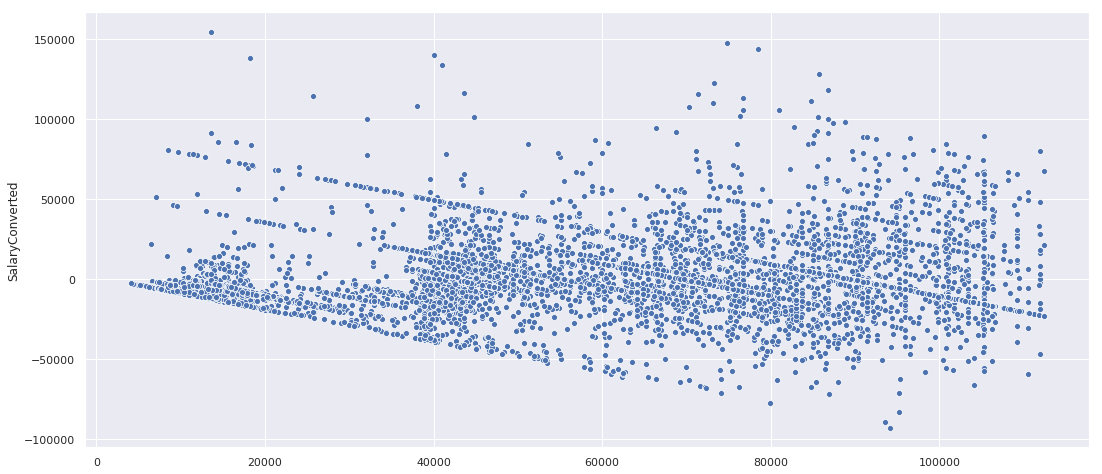

In [201]:
sns.scatterplot(x=y_pred, y=(Y_test-y_pred))

the residuals are positive when predicted salaries are in lower range and negative when salaries in higher range. that means, predicted salaries are low when actual salaries are high  and vise versa. it seems model predicted salaries closer to the mean. Also, residual variance is higher in the middle. 

In [202]:
# satsmodel linear regressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import *
from statsmodels.graphics.gofplots import ProbPlot

In [203]:
lm = sm.OLS(Y_train, X_train).fit()
#lm.summary()

In [204]:
print ("The rsquared values is " + str(lm.rsquared))
print ("The adjusted rsquared values is " + str(lm.rsquared_adj))

The rsquared values is 0.9241671977243648
The adjusted rsquared values is 0.923587473959408


In [205]:
# fitted values (need a constant term for intercept)
model_fitted_y = lm.fittedvalues

# model residuals
model_residuals = lm.resid

# normalized residuals
model_norm_residuals = lm.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = lm.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = lm.get_influence().cooks_distance[0]

In [206]:
model_abs_resid.sort_values(ascending=False).head(10) # top 10 deviations

6698    194234.343
4294    165641.878
35810   160139.467
11132   155261.438
27522   150201.917
5770    139810.687
21135   134626.410
23821   133699.964
8990    132961.328
24280   130113.287
dtype: float64

Text(0.5,1,'Residuals vs Fitted')

Text(0.5,0,'Fitted values')

Text(0,0.5,'Residuals')

Text(81893,194234,'6698')

Text(68121.7,165642,'4294')

Text(80358.5,160139,'35810')

Text(24738.6,155261,'11132')

Text(72481.4,150202,'27522')

Text(64732.5,139811,'5770')

Text(48537.6,134626,'21135')

Text(27012.5,133700,'23821')

Text(27751.2,132961,'8990')

Text(74755.4,130113,'24280')

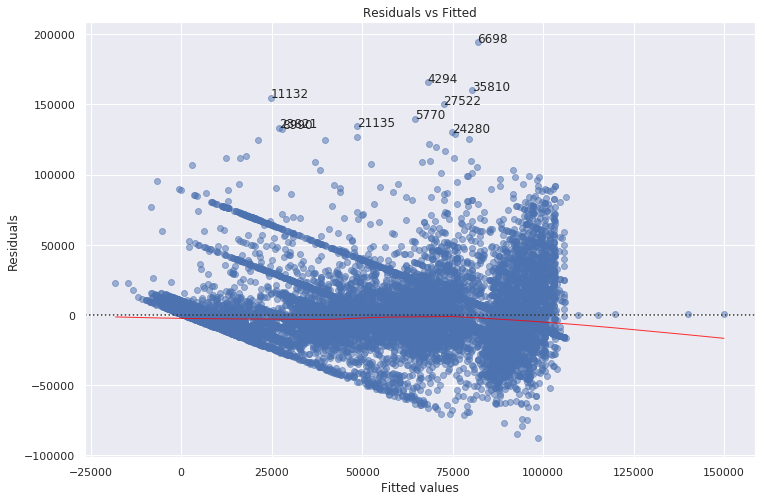

In [207]:
#plot Residuals vs Fitted
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, Y_train, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_10 = abs_resid[:10]

for i in abs_resid_top_10.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]));

Text(0.5,1,'Normal Q-Q')

Text(0.5,0,'Theoretical Quantiles')

Text(0,0.5,'Standardized Residuals')

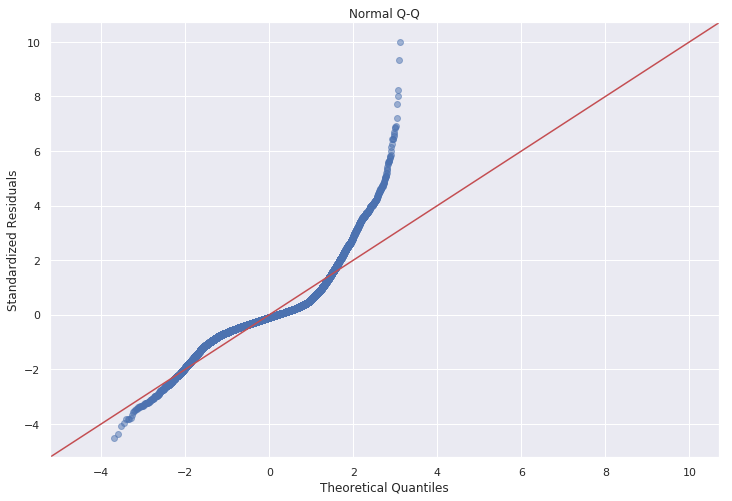

In [208]:
#plot Normal Q-Q
QQ = ProbPlot(model_norm_residuals)

plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals')

Residuals do not seem to follow a clear normal distribution.

Text(0.5,1,'Scale-Location')

Text(0.5,0,'Fitted values')

Text(0,0.5,'$\\sqrt{|Standardized Residuals|}$')

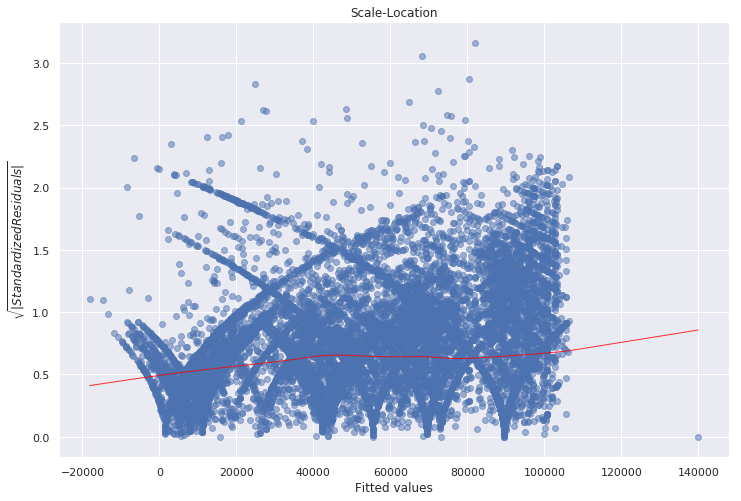

In [209]:
#plot Scale-Location
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

#for i in abs_norm_resid_top_3:
 #   plot_lm_3.axes[0].annotate(i, 
  #                             xy=(model_fitted_y[i], 
   #                                model_norm_residuals_abs_sqrt[i]))

There is no clear trend in standard deviation of residuals.

In [210]:
print (4/(n-p-1))

0.0004442963456625569


In [211]:
leverage_top_10 = np.flip(np.argsort(model_cooks), 0)[:10]
for i in leverage_top_10:
 print(i, model_leverage[i], model_abs_resid.iloc[i], model_cooks[i])

6992 1.0000000000000009 2.0372681319713593e-10 nan
627 1.000000000000001 8.731149137020111e-11 nan
15064 1.0000000000000007 1.7462298274040222e-10 nan
3782 1.0000000000000013 1.673470251262188e-10 nan
15701 1.0000000000000002 2.6193447411060333e-10 nan
17353 1.0000000000000004 4.3655745685100555e-11 nan
15970 1.0000000000000009 2.9103830456733704e-11 nan
14965 1.0000000000000009 1.0186340659856796e-10 nan
7779 1.0000000000000018 1.1641532182693481e-10 nan
1409 1.0000000000000075 1.4551915228366852e-10 nan


(0, 0.2)

(-3, 5)

Text(0.5,1,'Residuals vs Leverage')

Text(0.5,0,'Leverage')

Text(0,0.5,'Standardized Residuals')

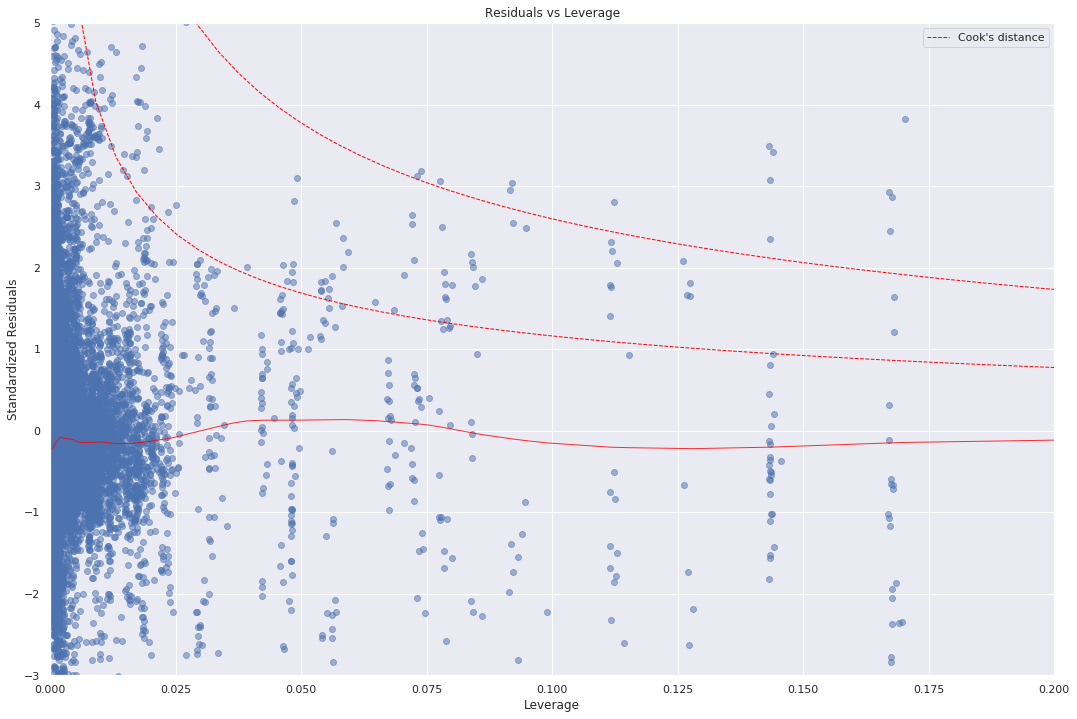

In [212]:
#plot Residuals vs Leverage
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(12)
plot_lm_4.set_figwidth(18)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_5 = np.flip(np.argsort(model_cooks), 0)[:5]

#for i in leverage_top_5:
 # plot_lm_4.axes[0].annotate(i, 
  #                           xy=(model_leverage[i], 
   #                            '2'))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(lm.params) # number of model parameters

graph(lambda x: np.sqrt((0.001 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((0.005 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right')

few observations fall above 0.005 Cook's Distance line.

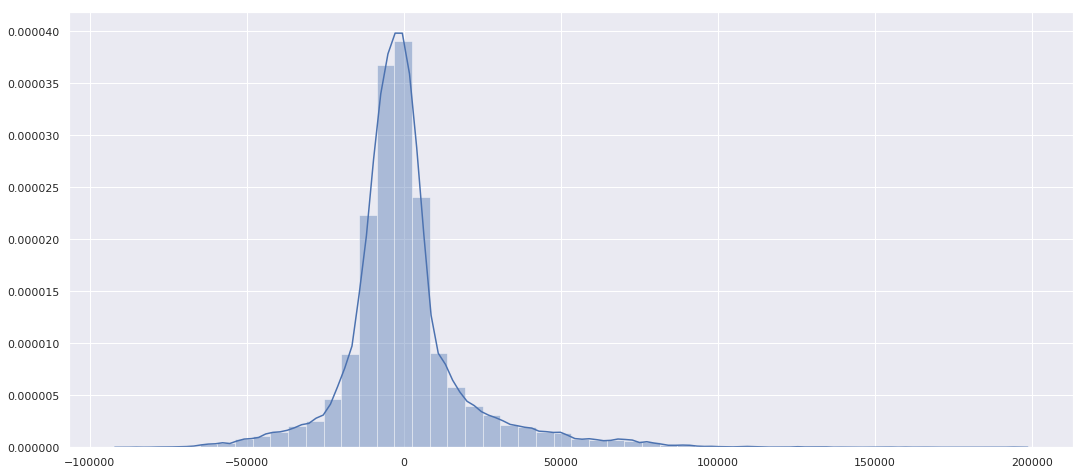

In [213]:
sns.distplot(model_residuals)

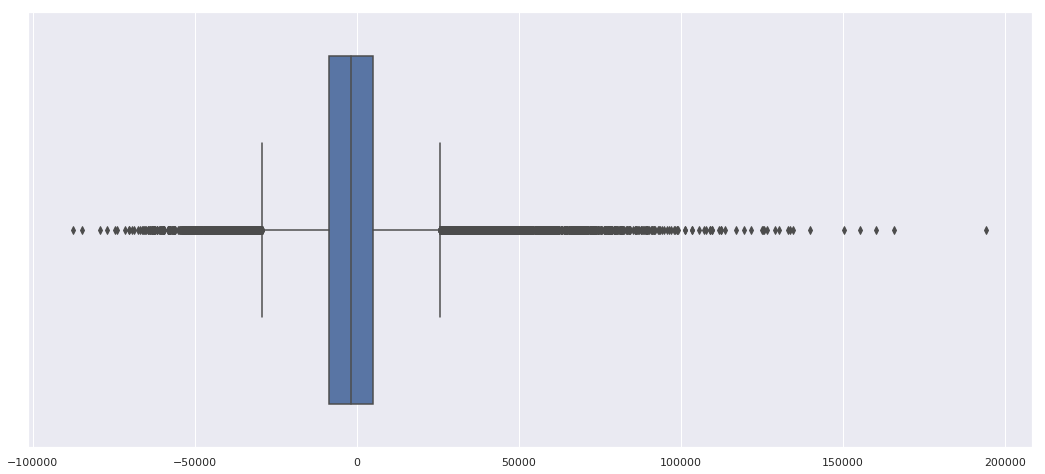

In [214]:
sns.boxplot(model_residuals)

In [215]:
y_pred = lm.predict(X_test)
evaluate_reg_model('OLS',X_test, Y_test, y_pred)

In [216]:
glm = sm.GLS(Y_train,X_train).fit()
#glm.summary()
Y_pred_glm = glm.predict(X_test)
evaluate_reg_model('glm',X_test, Y_test, Y_pred_glm)

In [217]:
#retry the OLS after taking out top 10 high leverage data points

In [218]:
X_train_wo= X_train.drop(X_train.index[leverage_top_10])
Y_train_wo = Y_train.drop(Y_train.index[leverage_top_10])

In [219]:
lmwo = sm.OLS(Y_train_wo, X_train_wo).fit()
Y_pred_lmwo = lmwo.predict(X_test)
#lmwo.summary()
evaluate_reg_model('OLS-wo-outliers',X_test, Y_test, Y_pred_lmwo)

In [220]:
# retry the OLS model after dropping insignificant features 

In [221]:
X_train_wc = X_train_wo.drop(['Gender_Female',
'Gender_Gender non-conforming',
'Gender_Transgender',
'CountryCode_ARM',
'CountryCode_BMU',
'CountryCode_BRA',
'CountryCode_CHN',
'CountryCode_DOM',
'CountryCode_ECU',
'CountryCode_EST',
'CountryCode_HND',
'CountryCode_LBN',
'CountryCode_MLT',
'CountryCode_MNE',
'CountryCode_PRT',
'CountryCode_PRY',
'CountryCode_SLV',
'CountryCode_SVK',
'CountryCode_SVN',
'CountryCode_SYC'],axis=1)

In [222]:
X_test = X_test.drop([
'Gender_Female',
'Gender_Gender non-conforming',
'Gender_Transgender',
'CountryCode_ARM',
'CountryCode_BMU',
'CountryCode_BRA',
'CountryCode_CHN',
'CountryCode_DOM',
'CountryCode_ECU',
'CountryCode_EST',
'CountryCode_HND',
'CountryCode_LBN',
'CountryCode_MLT',
'CountryCode_MNE',
'CountryCode_PRT',
'CountryCode_PRY',
'CountryCode_SLV',
'CountryCode_SVK',
'CountryCode_SVN',
'CountryCode_SYC'
],axis=1)

In [223]:
lmwc = sm.OLS(Y_train_wo, X_train_wc).fit()
Y_pred_lmwc = lmwc.predict(X_test)
#lmwc.summary()
evaluate_reg_model('OLS-wo-insignificant-features',X_test, Y_test, Y_pred_lmwc)

In [224]:
reg_score_df

,Regressor,mae,median_ae,mse,r2,adj_r2
0,"LinearRegression(copy_X=True, fit_intercept=Tr...",27619095984490.332,6968.721,6982803584645690448737411792896.000,-5234610398810300481536.000,-5321824833978749681664.000
1,"ElasticNet(alpha=1.0, copy_X=True, fit_interce...",25010.442,19873.245,971492133.421,0.272,0.260
2,"DecisionTreeRegressor(criterion='mse', max_dep...",13603.250,6099.562,544468816.655,0.592,0.585
3,"MLPRegressor(activation='relu', alpha=0.0001, ...",18372.137,14812.683,585426341.067,0.561,0.554
4,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",30086.678,22300.079,1389950956.543,-0.042,-0.059
5,"RandomForestRegressor(bootstrap=True, criterio...",12955.036,6833.897,444378236.373,0.667,0.661
6,"GradientBoostingRegressor(alpha=0.9, criterion...",13414.852,8290.511,417435136.131,0.687,0.682
7,"AdaBoostRegressor(base_estimator=None, learnin...",24365.084,18419.404,976794243.719,0.268,0.256
8,"XGBRegressor(base_score=0.5, booster='gbtree',...",12547.281,7228.742,388963139.179,0.708,0.704
9,OLS,12545.398,7273.942,399323321.093,0.701,0.696


From the above,  XGBoost regressor did slightly better job than other models with lowest mse and highest adjusted r2 score. GLM and OLS got exactly same score. Eventhough OLS achieved .92 r2 score with training data, it did not get the same level of accuracy with test data indicating overfitting problem.  Interestingly, removing observations with high leverage and getting rid of insignificant variables did not make any improvement , and instead it detoriated the model performance..

RandomForest Regressor performed better when median error is considered instead of mean error.

## 5.Summary

### Key observations from EDA:

> * There is some correlation between salary and career satisfaction worldwide but not strong enough to conclude any theory. The Pearson correlation coefficient is very low (**0.0847**) . One explanation can be that salaries are widespread in each satisfaction level starting from very low to very high salaries. it may be a data quality issue or incorrect entry of the values by some respondents.  Another reason is that there are many outliers. However, we can see the the pattern that from satisfaction levels 5 to 9 the mean/median salary gradually increases.

> * As we can see, people who work full time remotely are most satisfied and people who never worked remotely are least satisfied. It appears flexibility plays vital role in career satisfaction. It is no surprise that developers value the option to work remotely as second most important after the vacation.

> * Data scientist's median salaries little higher compared to non-data scientists. The median salary for **Data scientists** is **55K**, whereas 
non data sceintists is **48K**. These salary values are standardized to global scale based on purchasing power parity index.

> * Developers who use Spaces earn **15,000** more on an average compared to those who use Tabs.

> * The longer the programming experience the developers have, the more salary they earn on average. For example, programmers who have more than 15 years of experience earn **47K** more than those who have 2 to 5 years of experience, on average.

### Key observations from ML:

> * **Clustering**: After applying K-means, Agglomerative, DBSCAN, hdbscan clustering models, it was evident that respondents seem to fall mainly into three clusters,  based on  career satisfaction and salary as these two are the features with highest variance. K-Means did a better job than Agglomorative. The silhouette score of Agglomerative clustering is 0.10, and K-Means with K=3 is 0.13.

> * **Classification**: In classification, allmost all the models did excellent job with evaluation scores reaching 0.99. Used the labels assigned by the clustering model. MLP classifier performed best.

> * **Regression**: Regression models (with salary as predictor variable) also performed well with adjusted r2 score close to 0.7. XGBoost regressor performed best out of all tested models.